In [43]:
import os
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from skimage.io import imread,imsave
import cv2
%matplotlib inline

In [2]:
im = imread('20191217/Fused/Fused_12_13_14_15.tif', plugin='tifffile')

In [3]:
im.shape

(144, 1223, 1983, 4)

(612.5, 992.5)


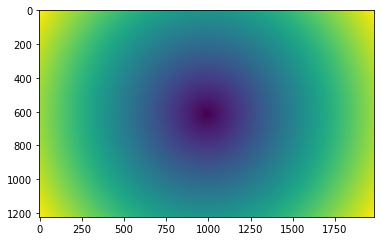

In [4]:
xx = np.arange(im.shape[2])
yy = np.arange(im.shape[1])
y,x = np.meshgrid(xx,yy)
c = im.shape[1] / 2 + 1, im.shape[2] / 2 + 1
r = np.sqrt( (x-c[0])**2 + (y-c[1])**2 )
print(c)
plt.imshow(r)

In [17]:
nbins = 50
width = r.max()//nbins
tim = im[-1,:,:,0]
kymo = np.zeros((144,nbins,3))
for R in range(nbins):
    # all points in the image that are inside the (r > R*width)*(r < (R+1)*width) area
    idx = np.where((r > R*width)*(r < (R+1)*width))
    for c in range(3):
        #plt.subplot(3,1,c+1)
        for t in range(im.shape[0]):
            vals = im[t,idx[0],idx[1],c]
            mean = vals.mean()
            kymo[t,R,c] = mean
            #plt.plot(R*width, mean, cols[c]+'.')

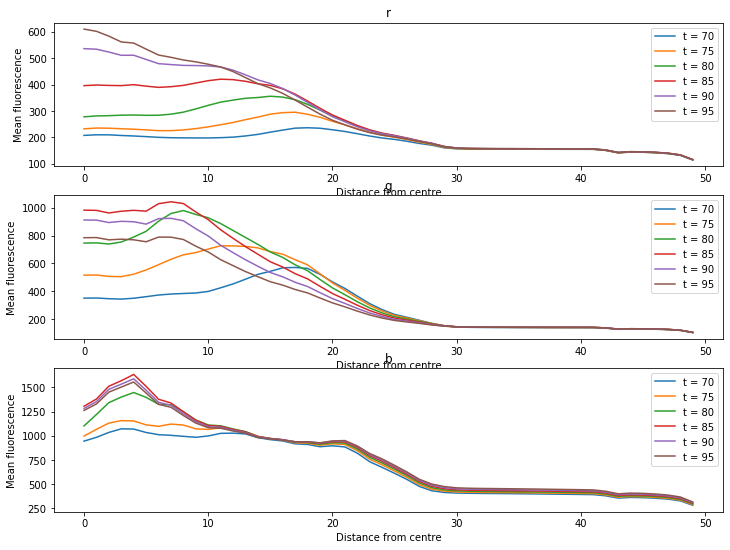

In [32]:
cols = ['r', 'g', 'b']
plt.figure(figsize=(12,9))
for c in range(3):
    plt.subplot(3,1,c+1)
    plt.plot(kymo[70:100:5,:,c].transpose())
    plt.legend(['t = ' + str(t) for t in range(70,100,5)])
    plt.xlabel('Distance from centre')
    plt.ylabel('Mean fluorescence')
    plt.title(cols[c])

/home/guillermo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


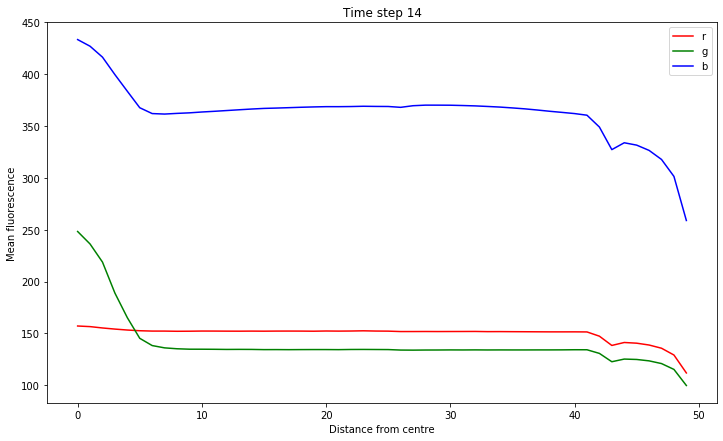

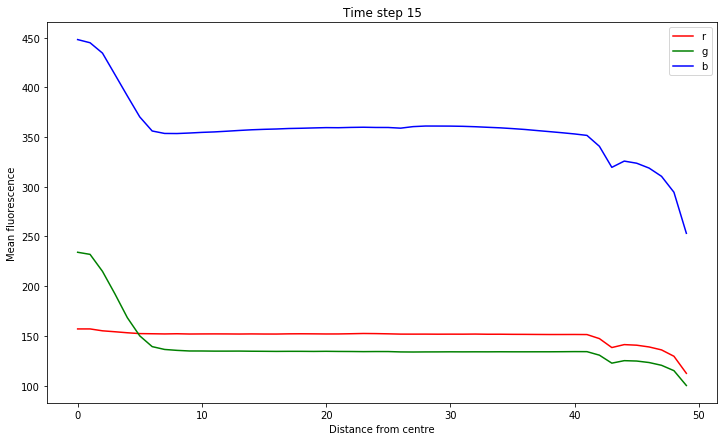

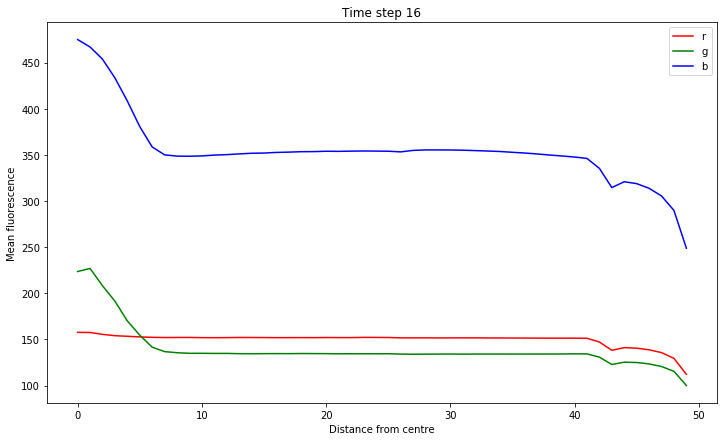

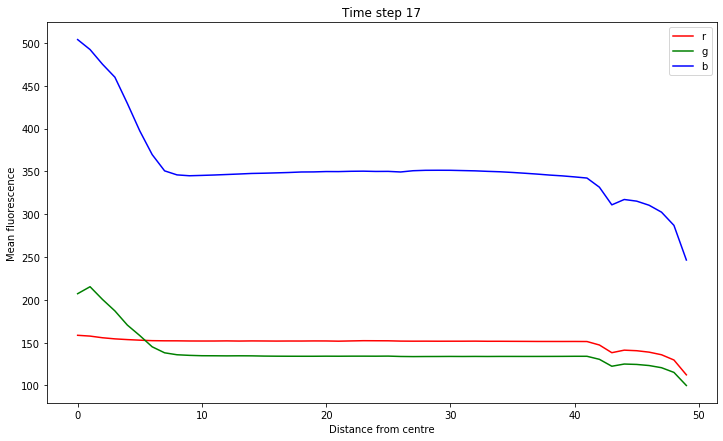

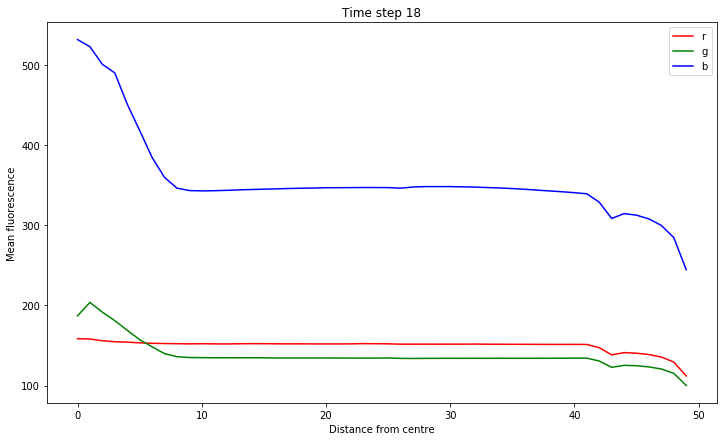

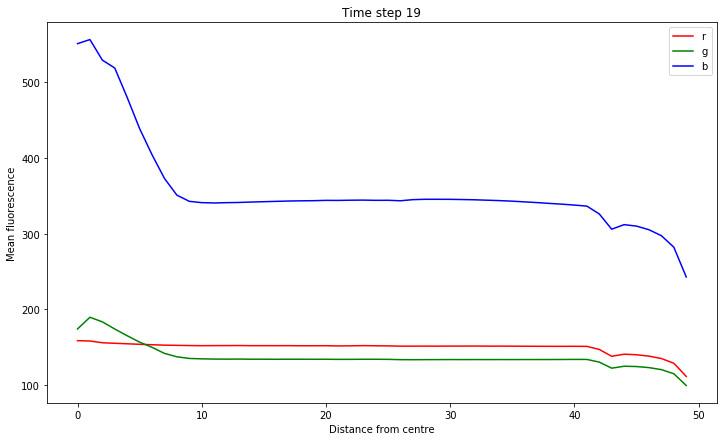

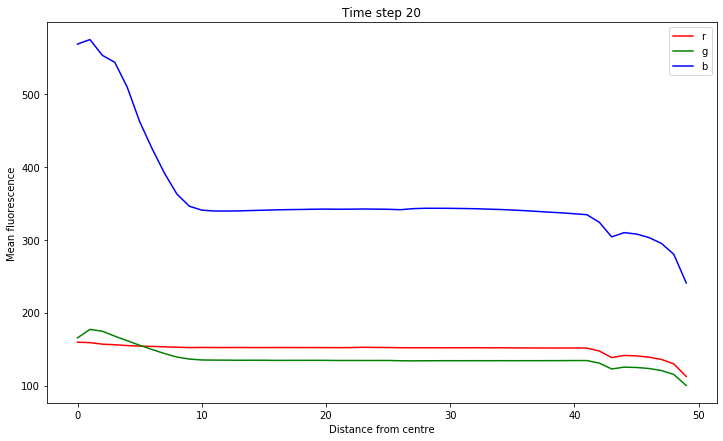

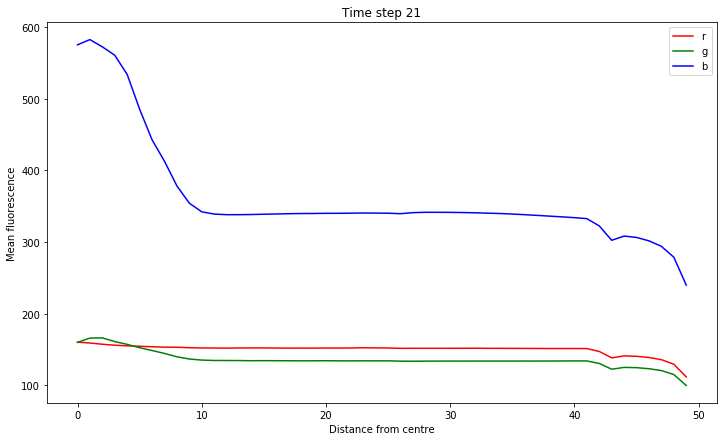

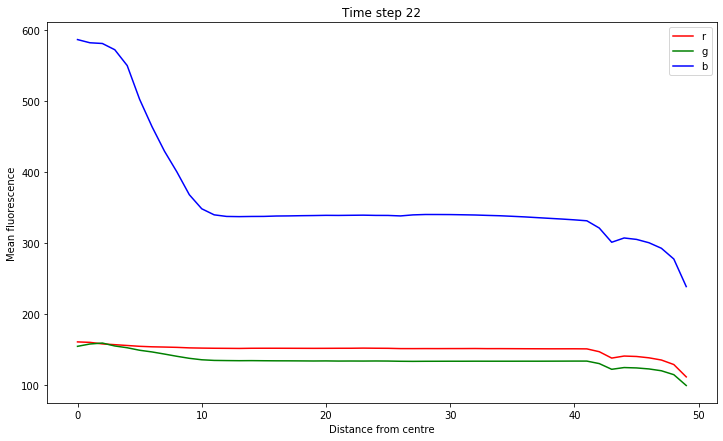

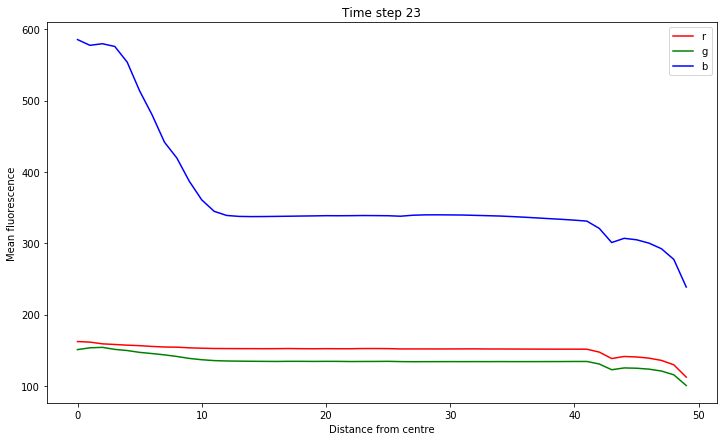

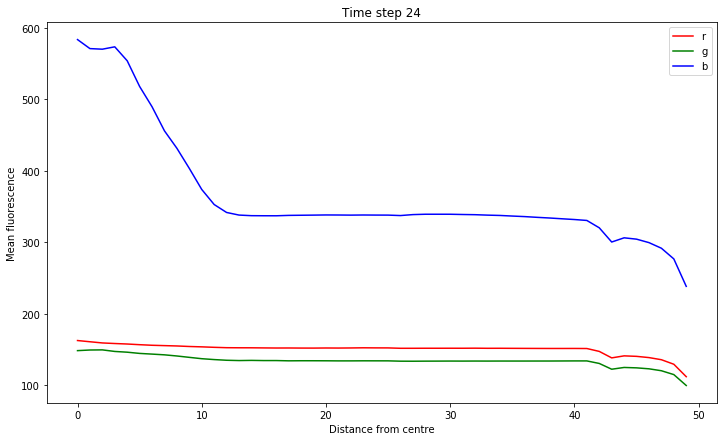

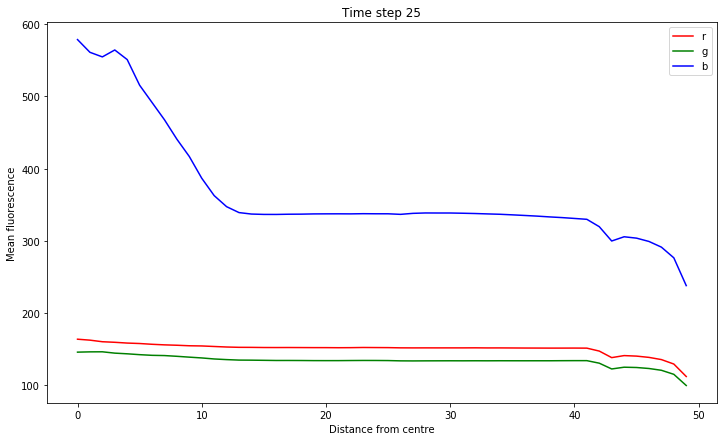

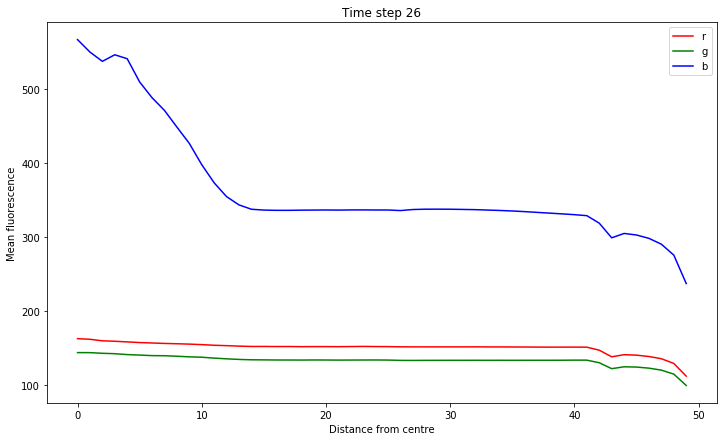

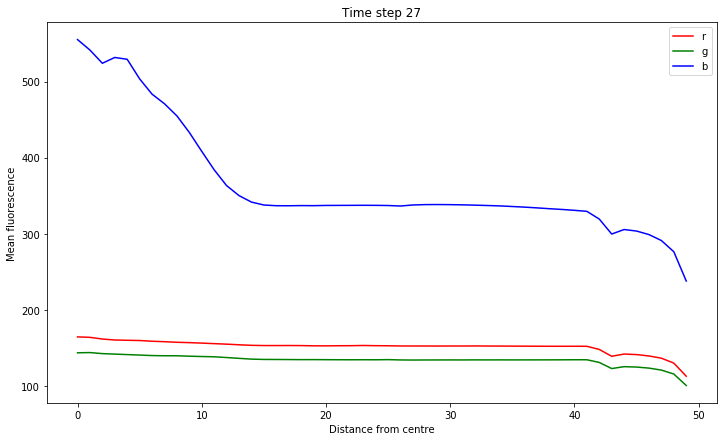

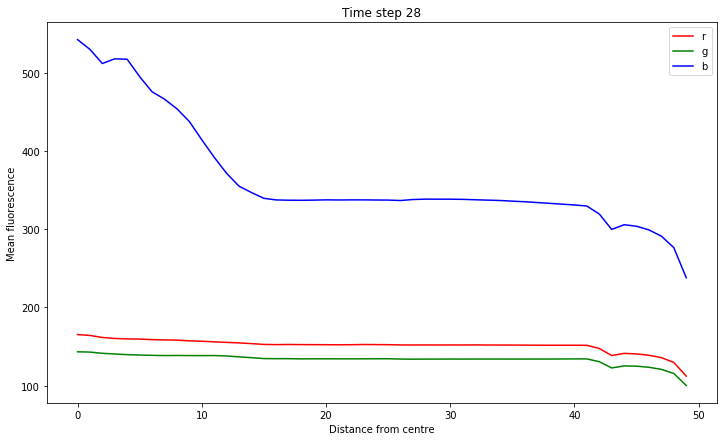

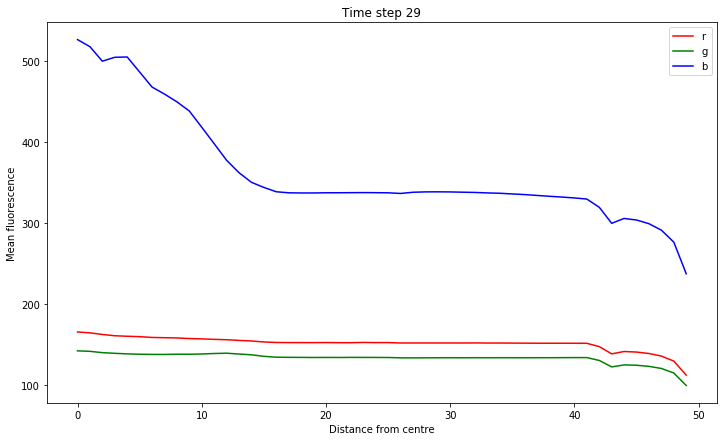

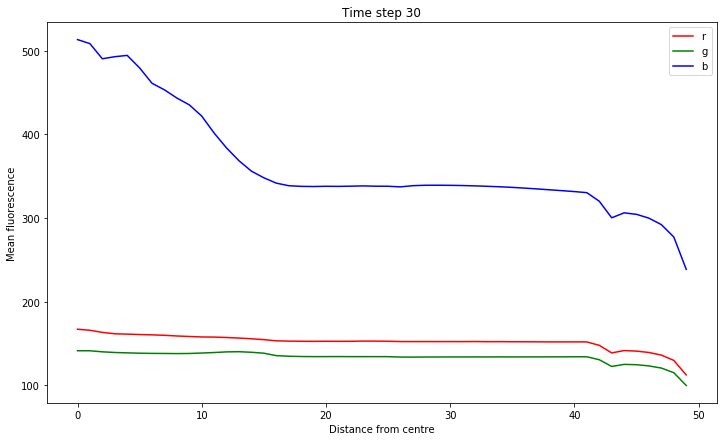

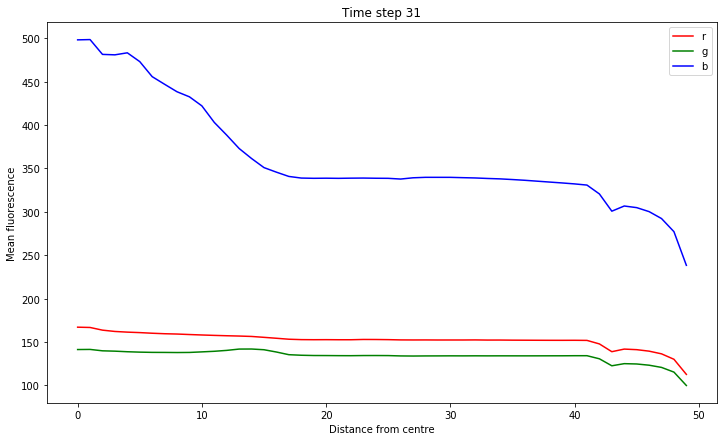

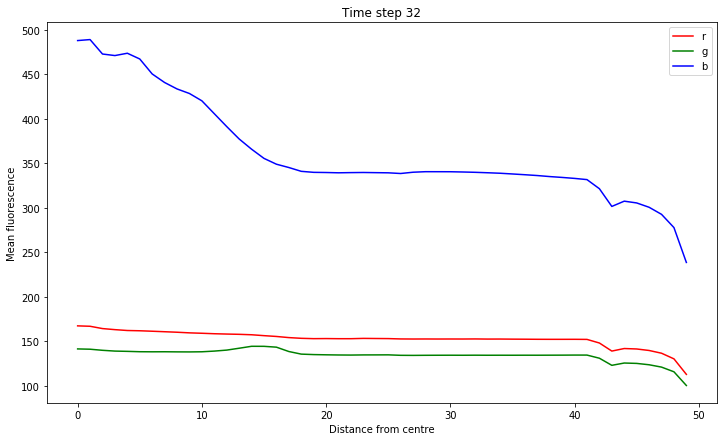

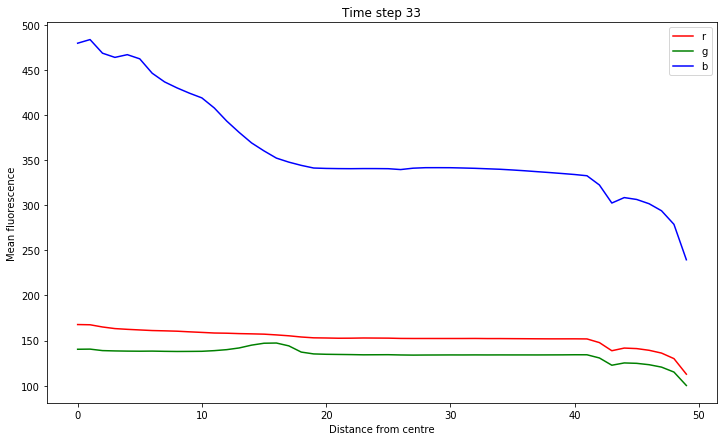

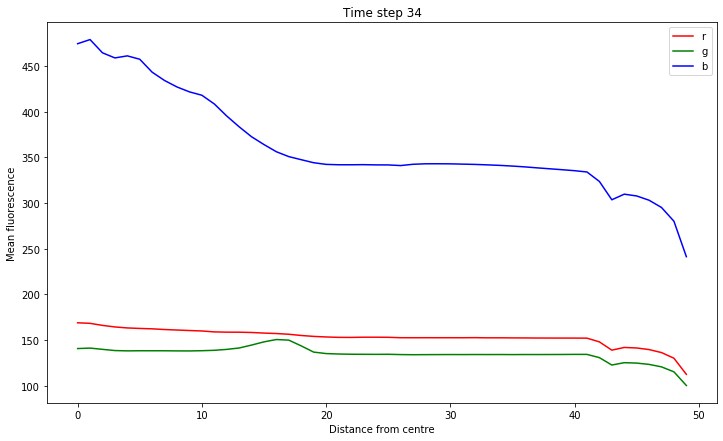

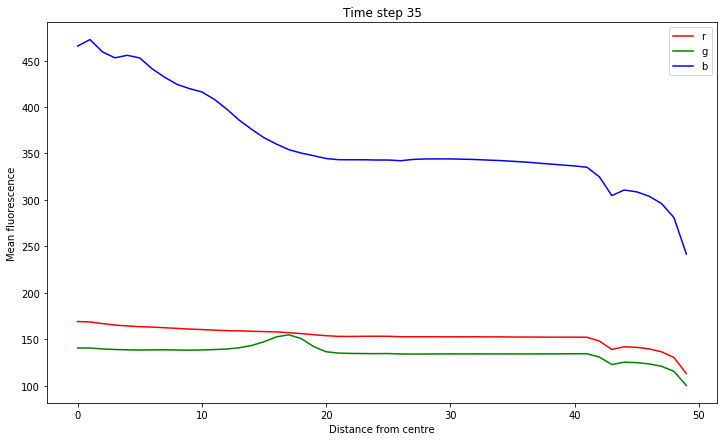

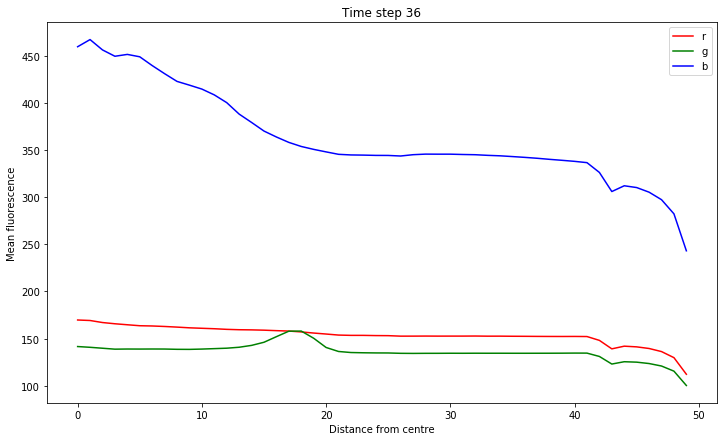

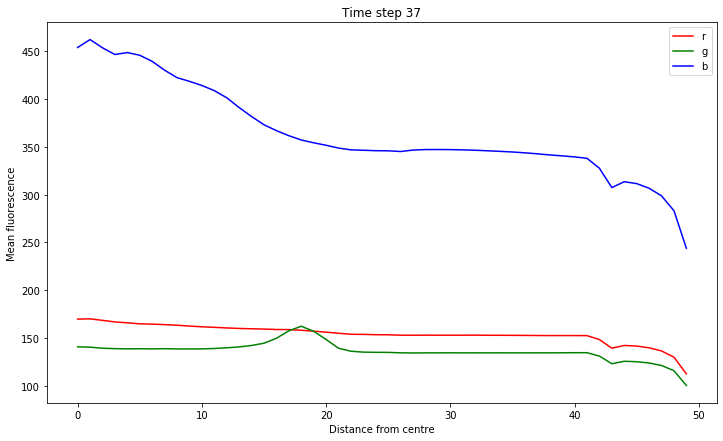

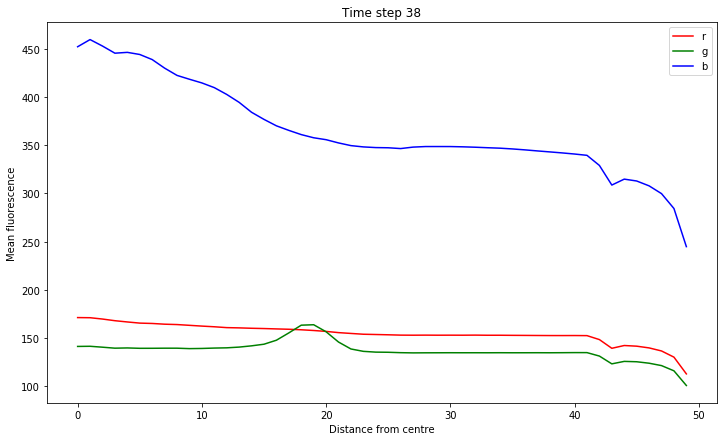

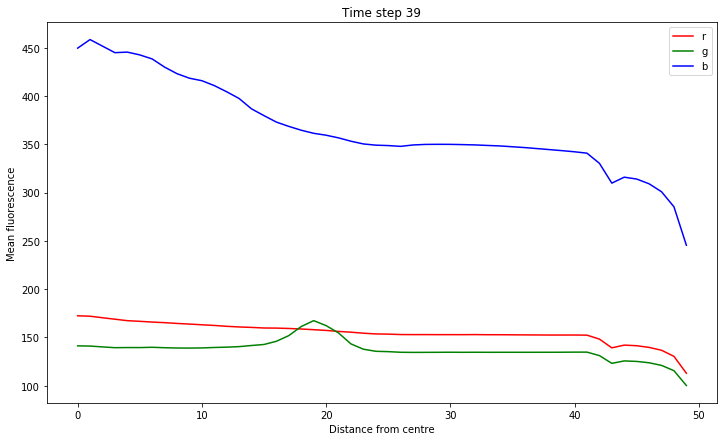

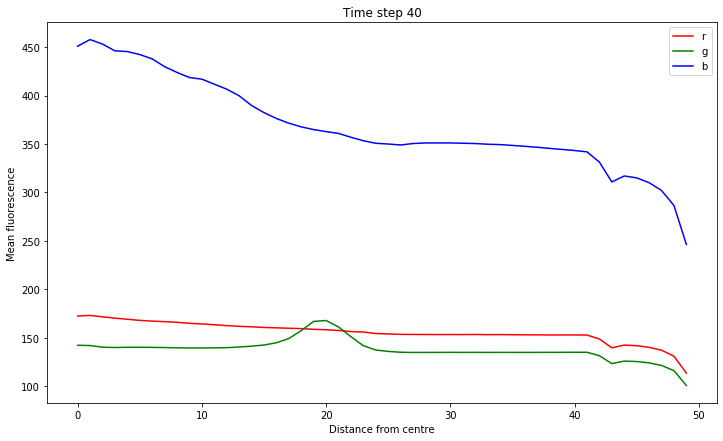

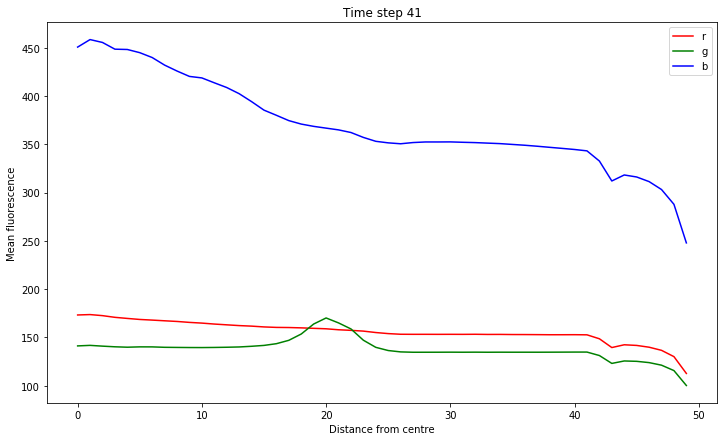

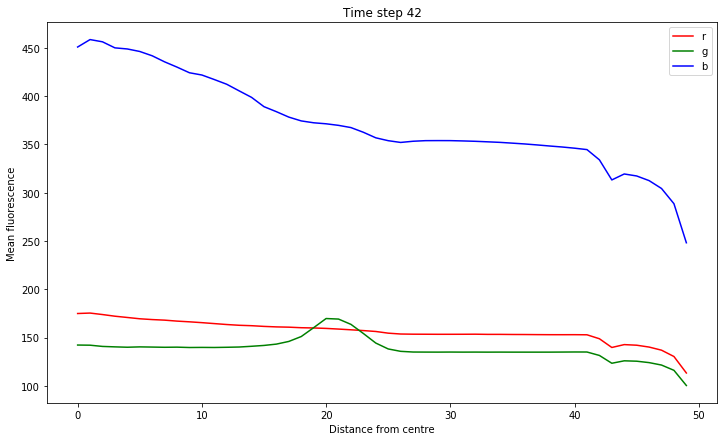

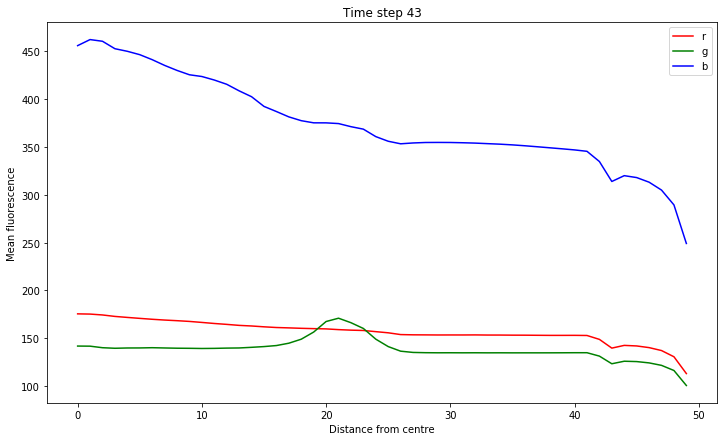

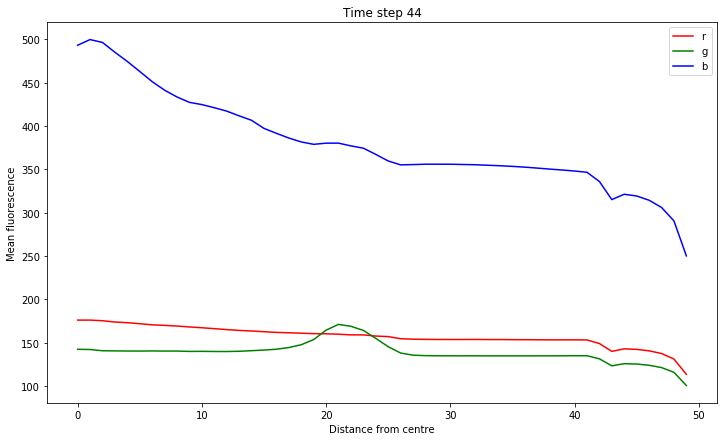

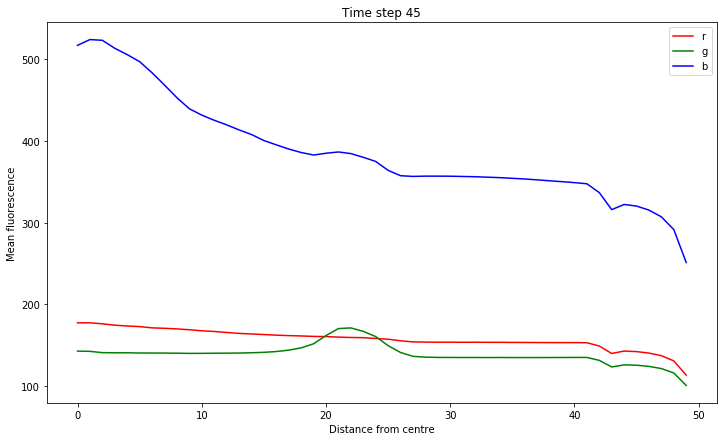

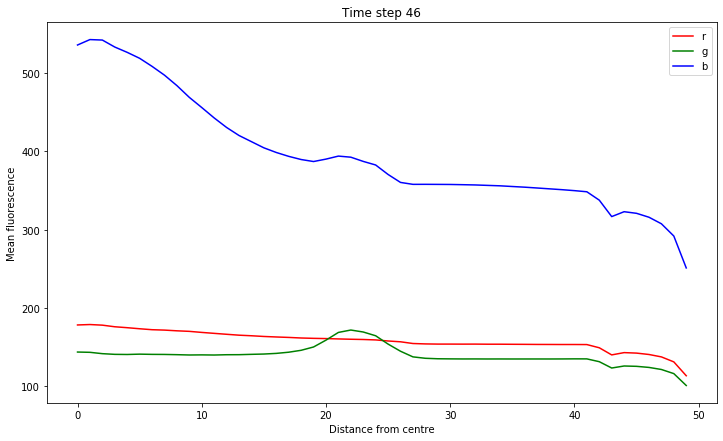

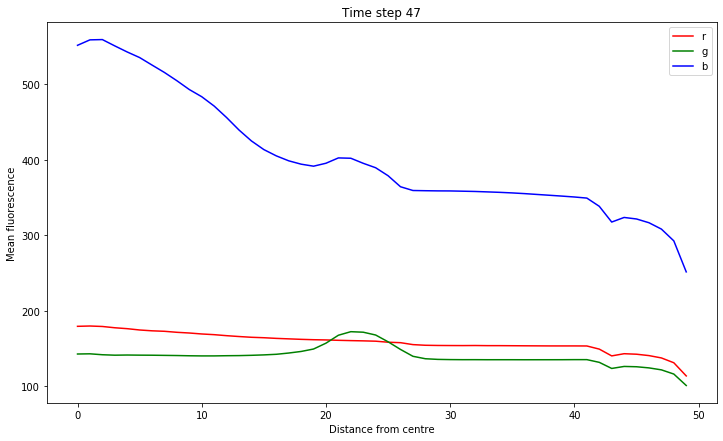

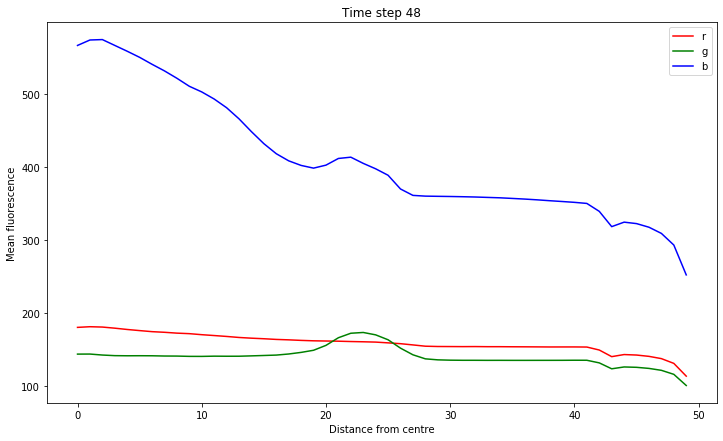

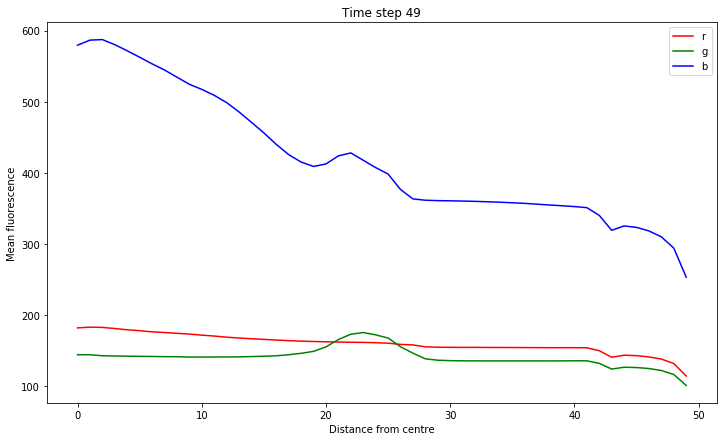

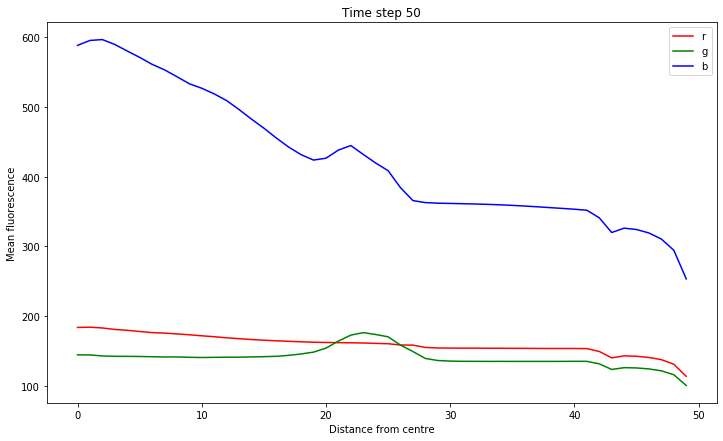

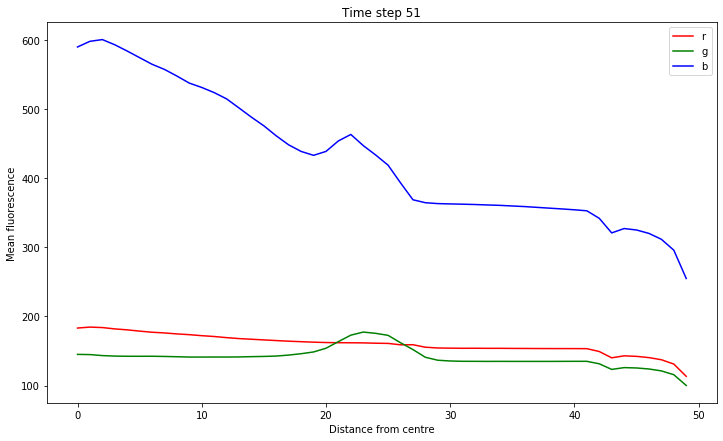

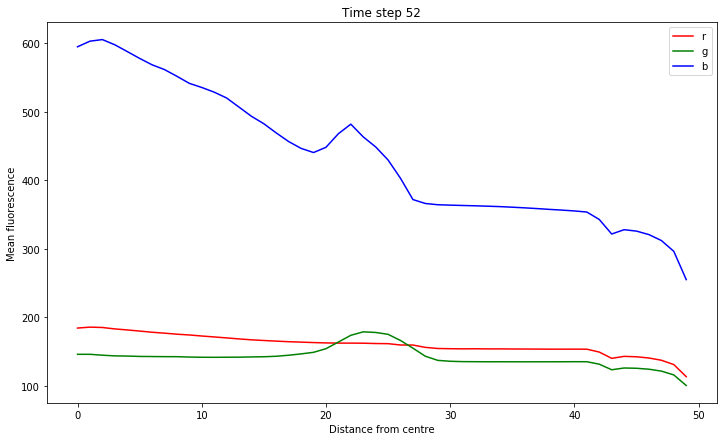

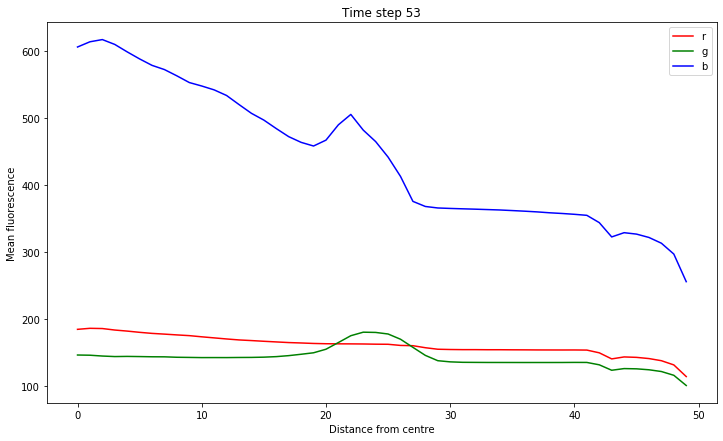

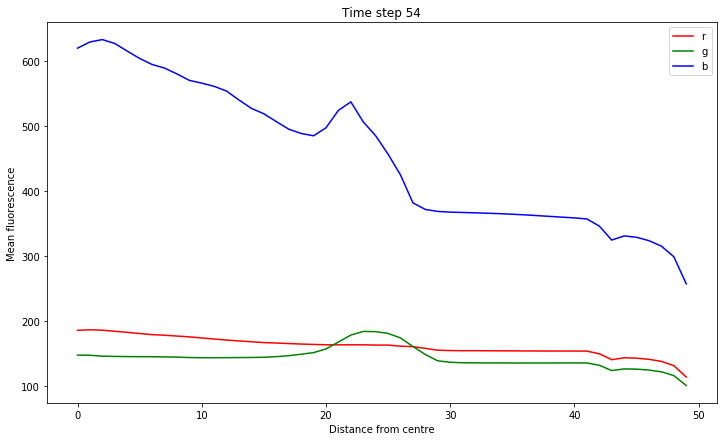

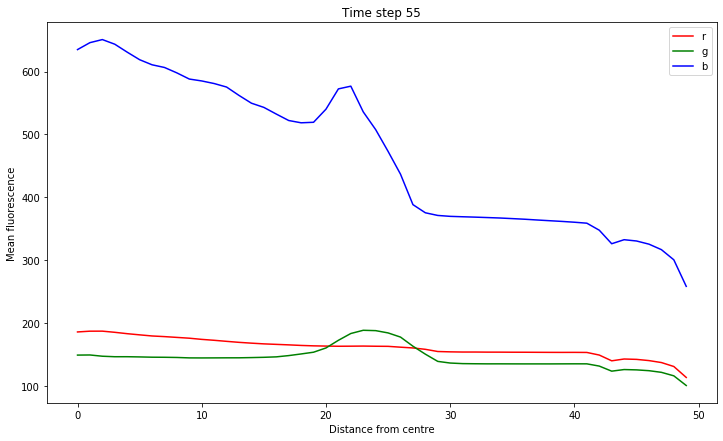

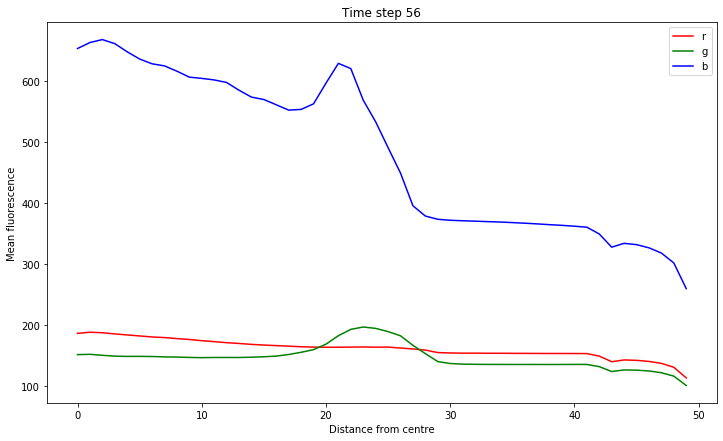

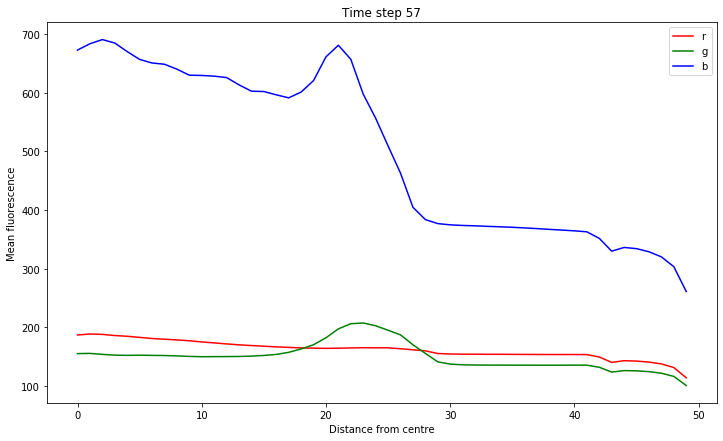

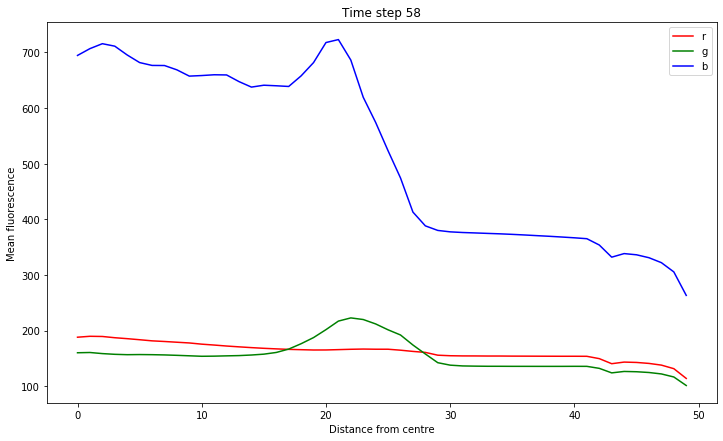

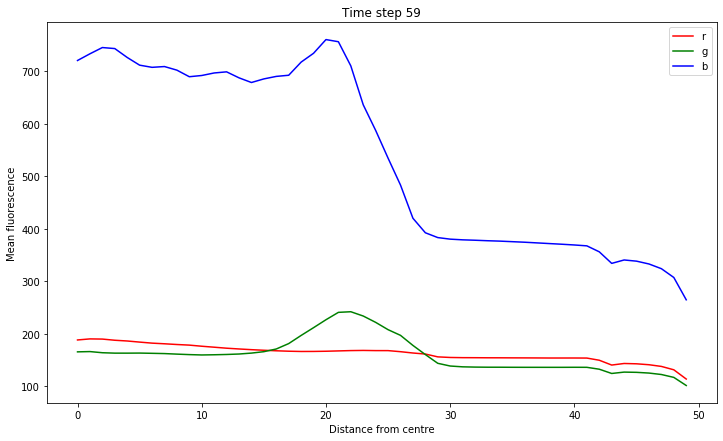

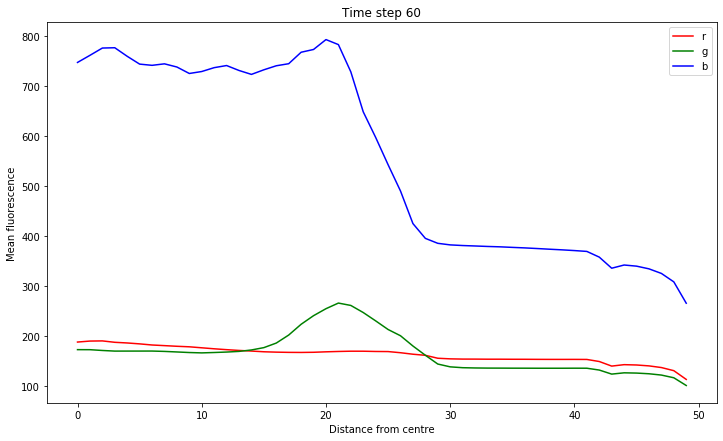

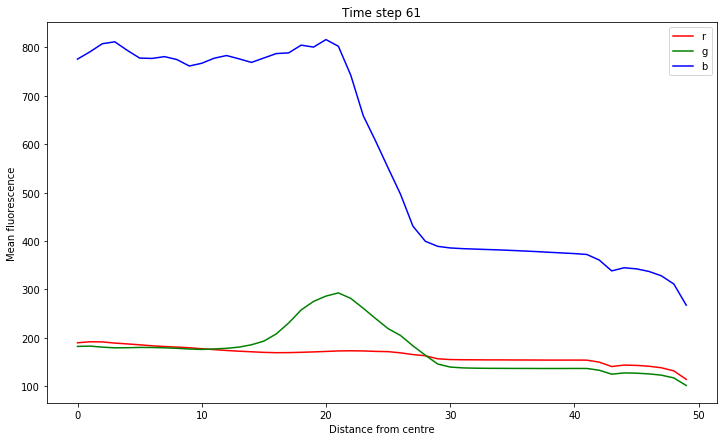

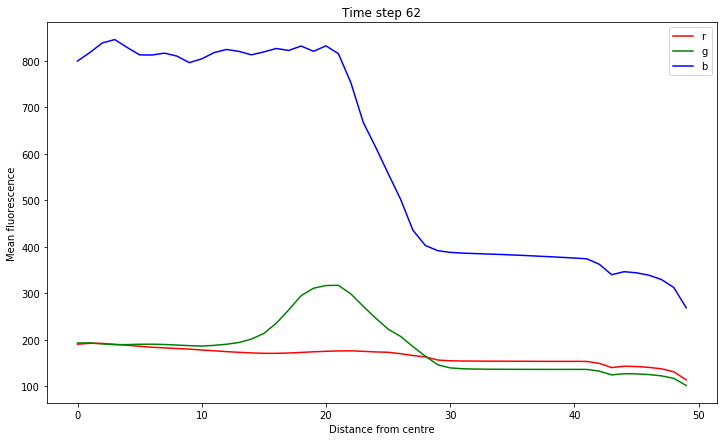

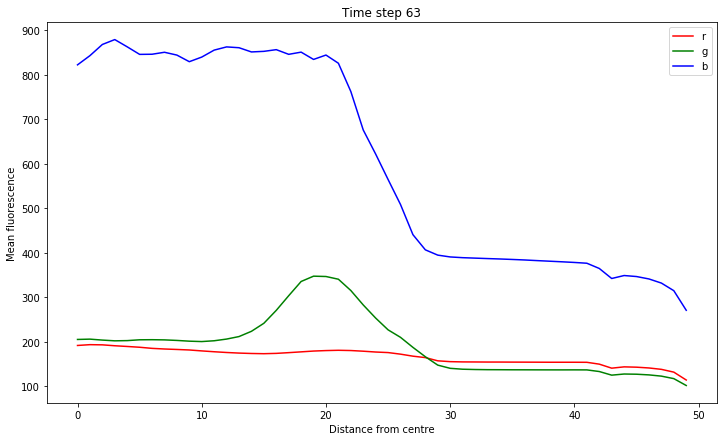

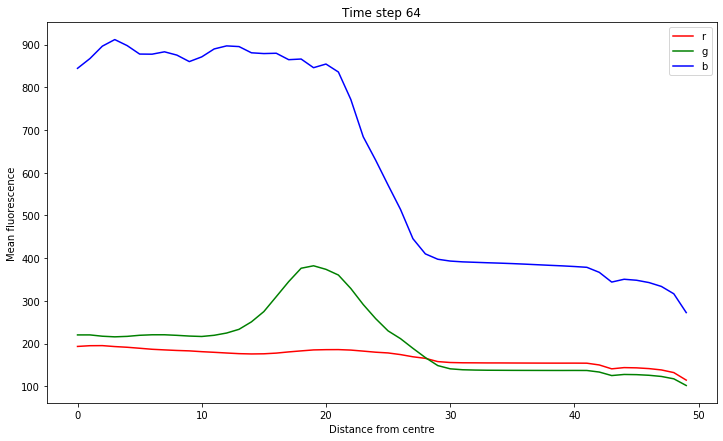

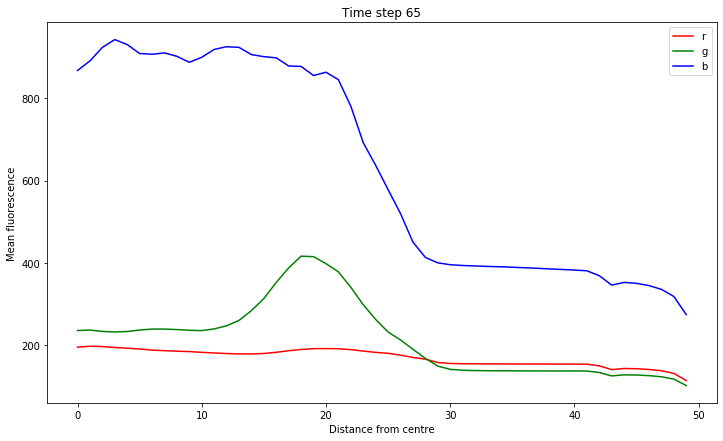

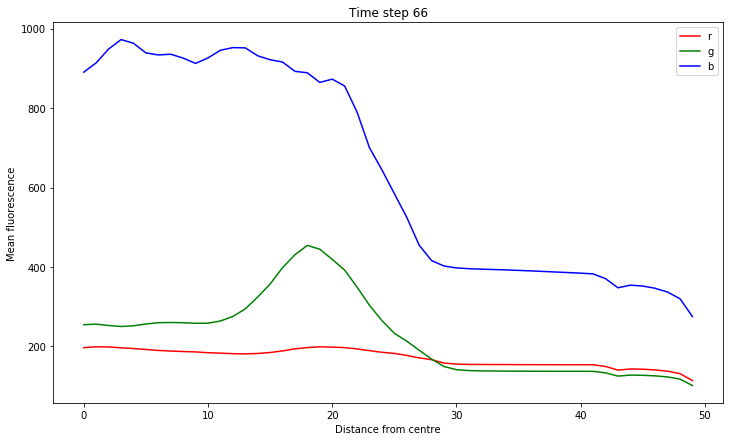

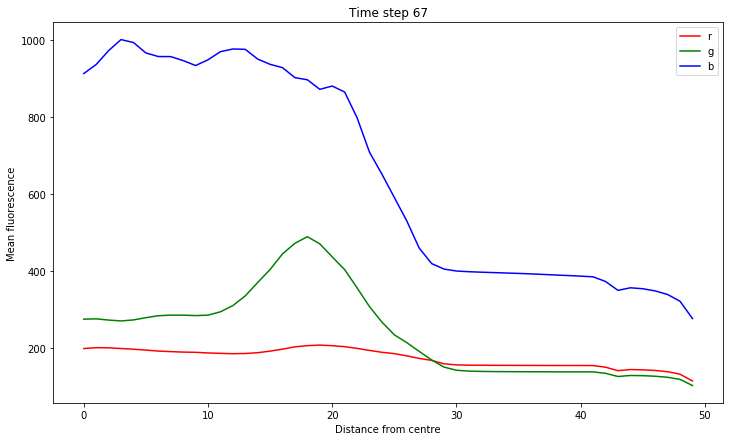

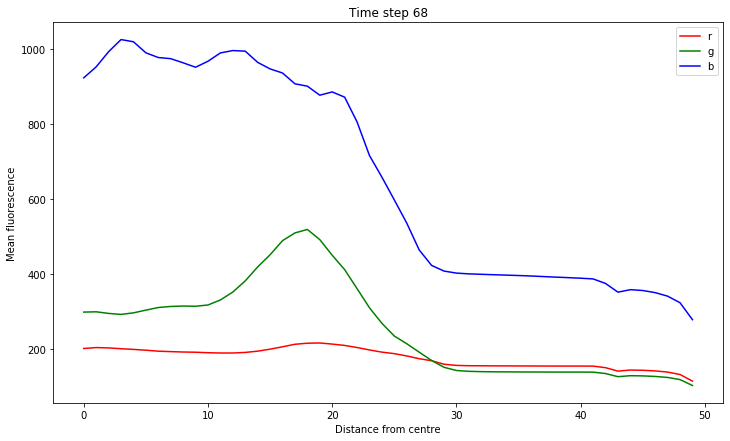

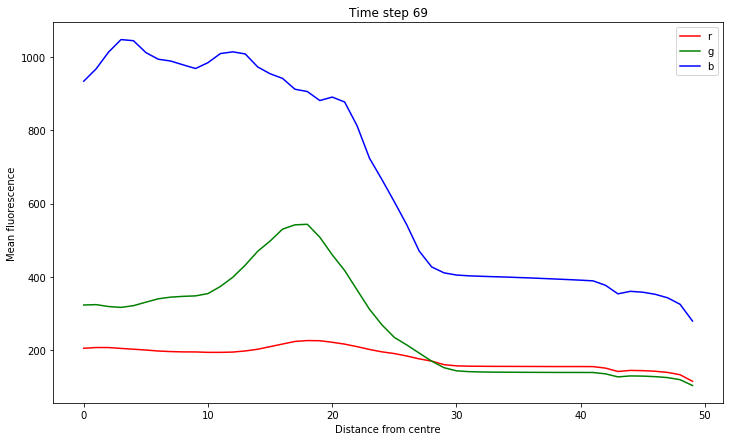

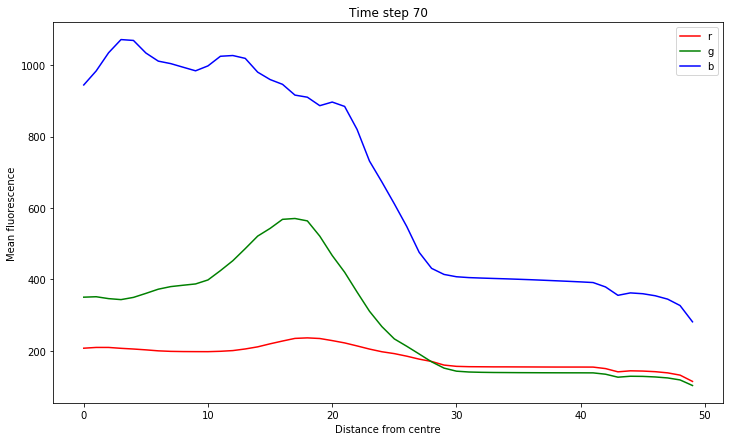

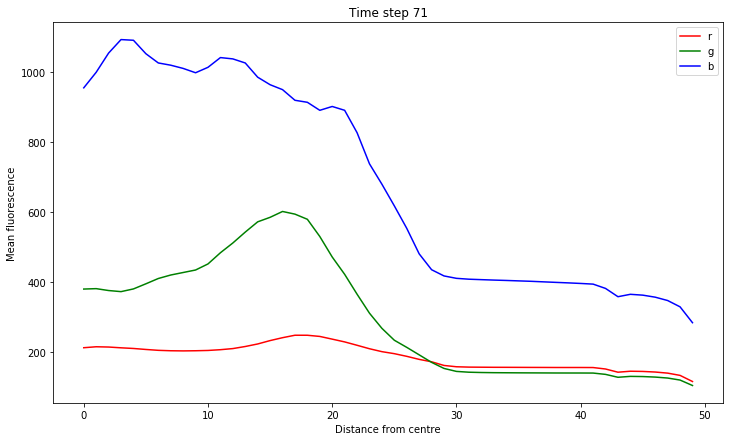

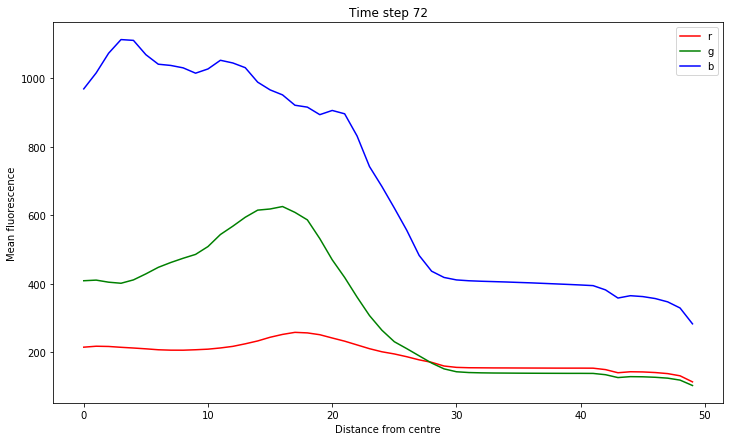

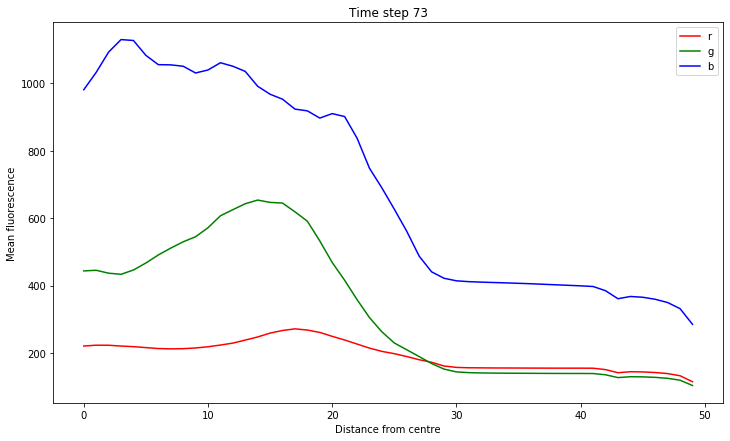

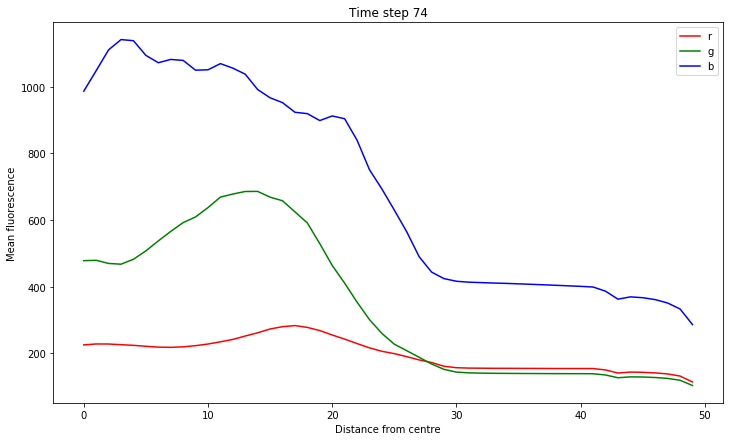

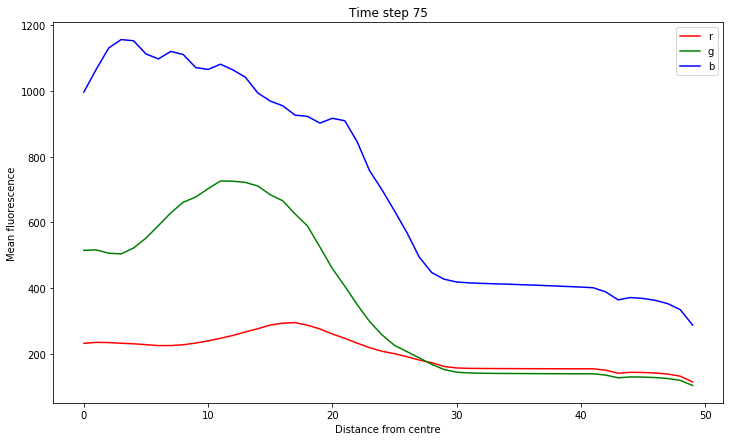

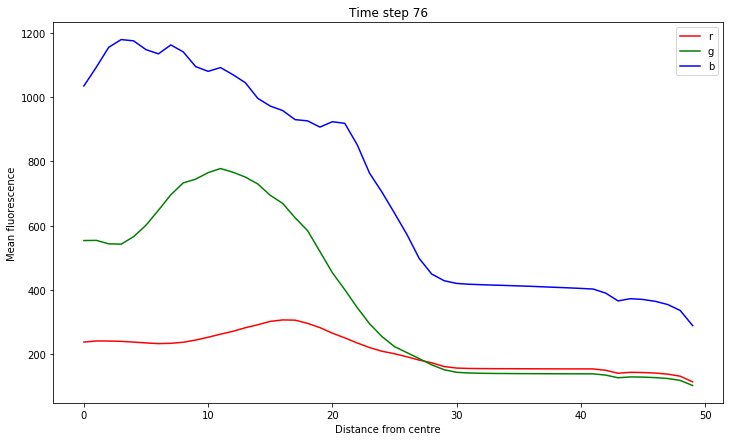

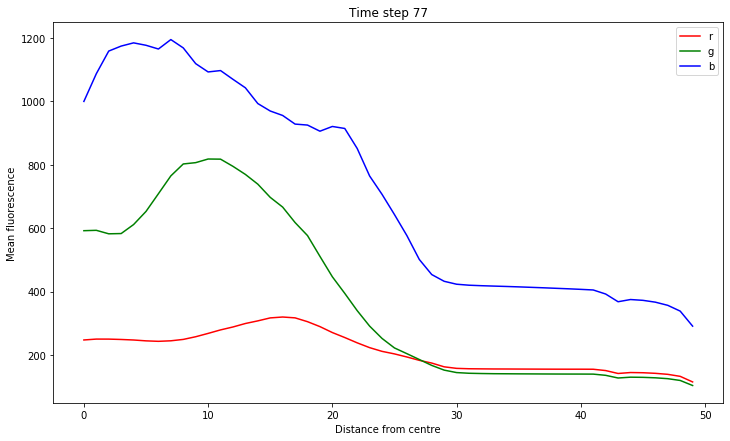

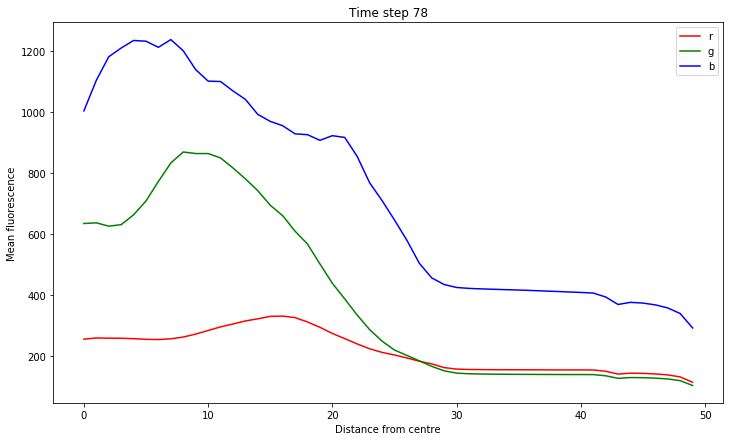

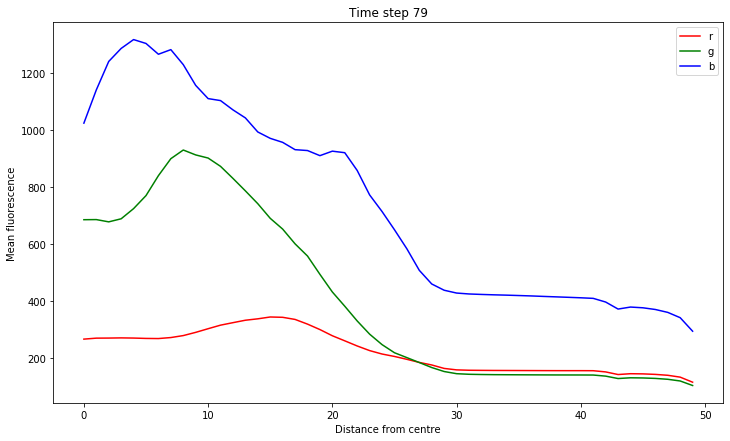

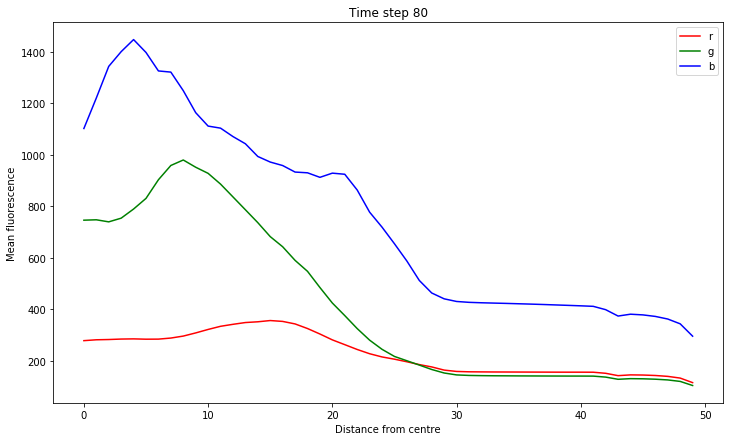

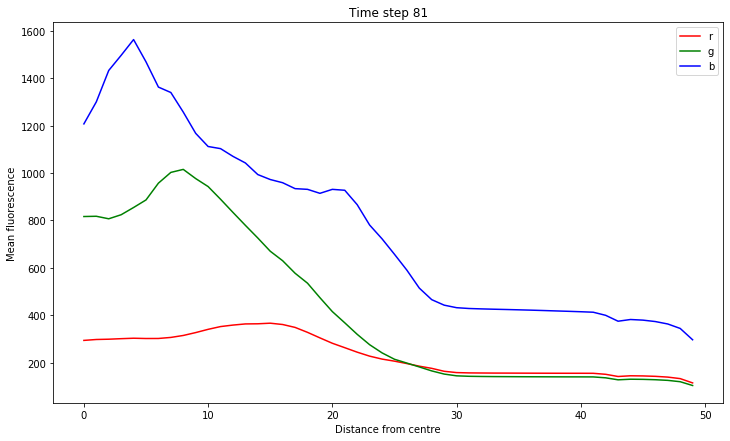

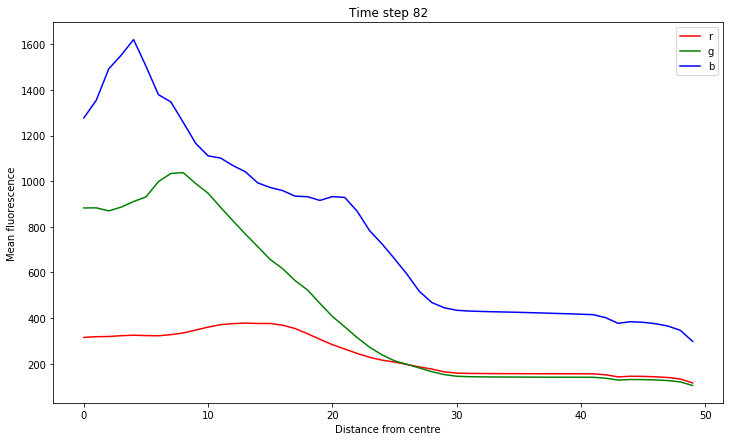

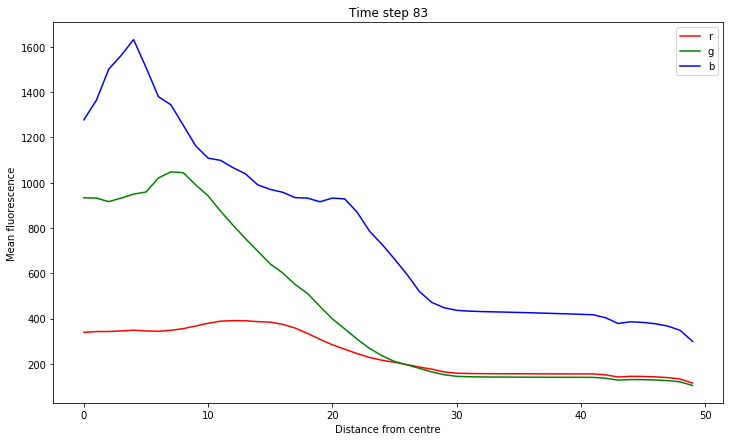

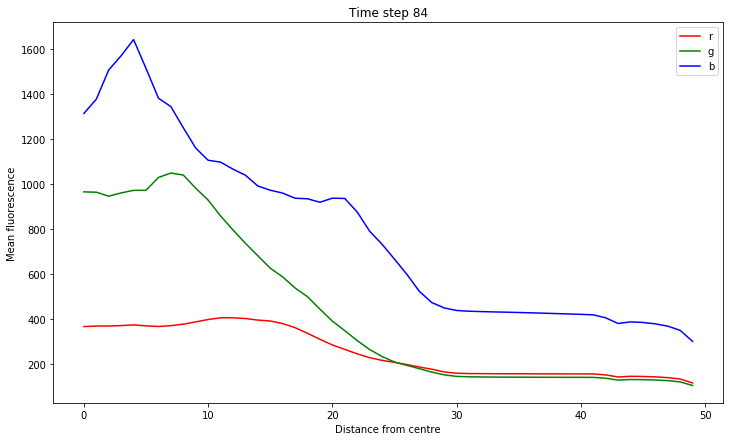

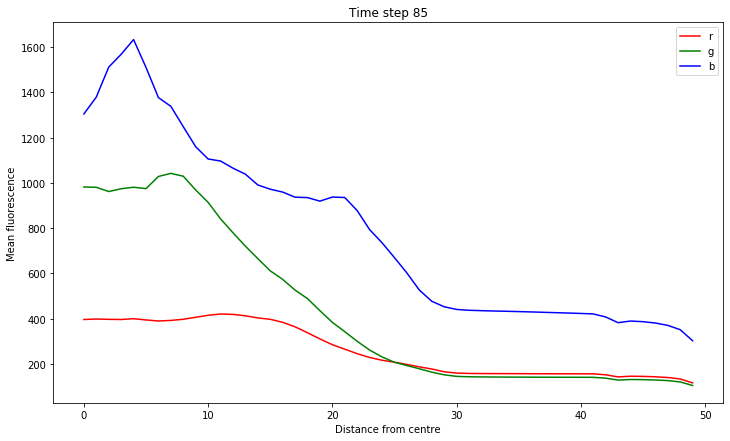

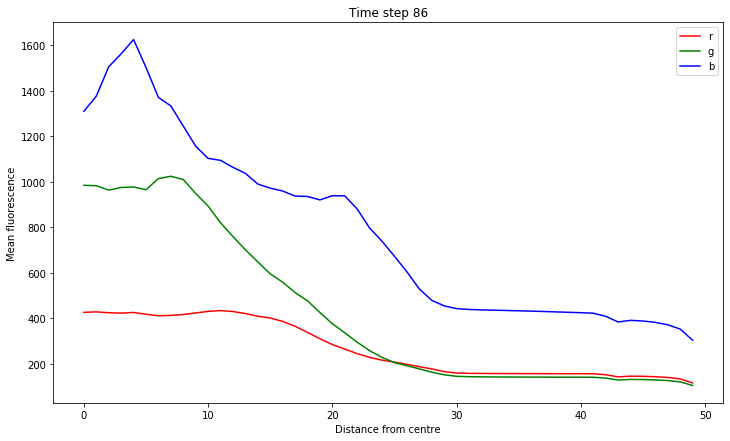

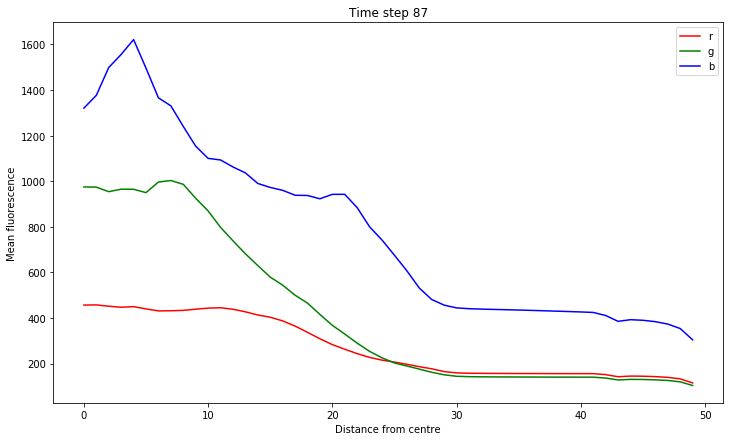

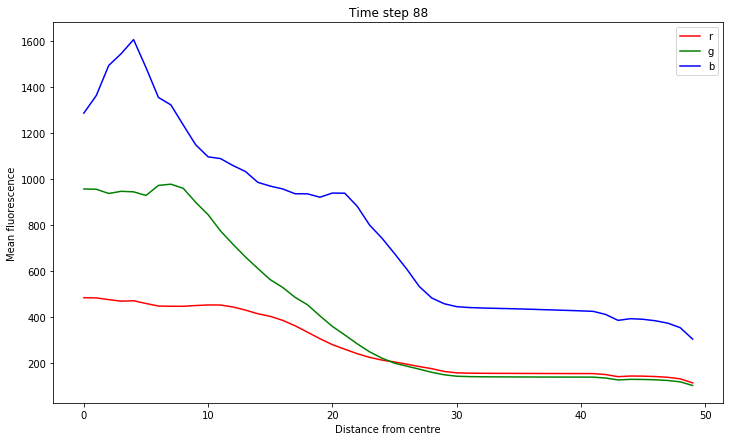

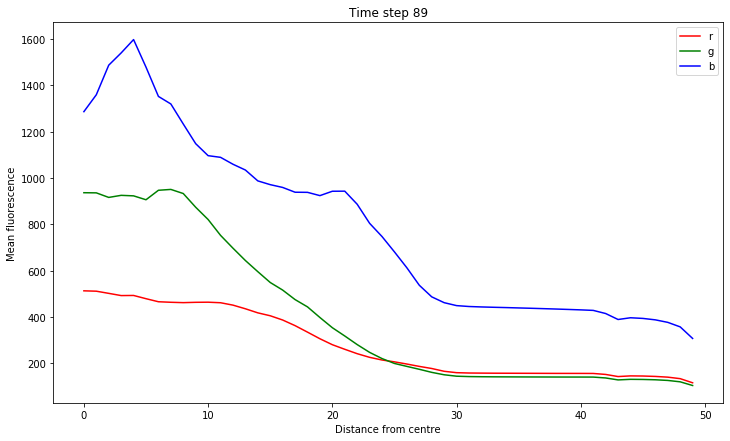

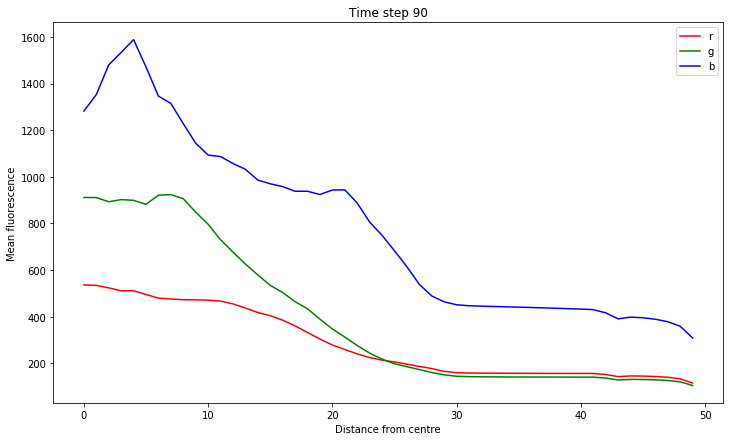

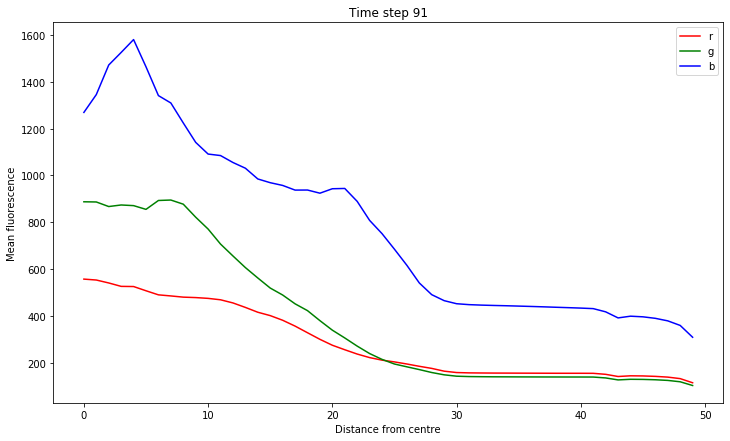

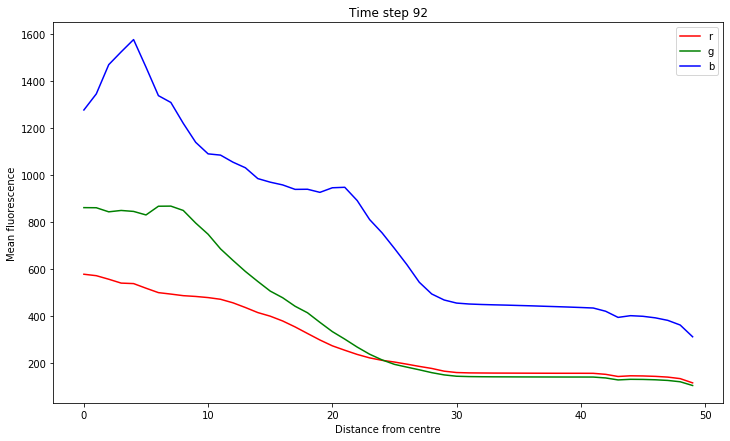

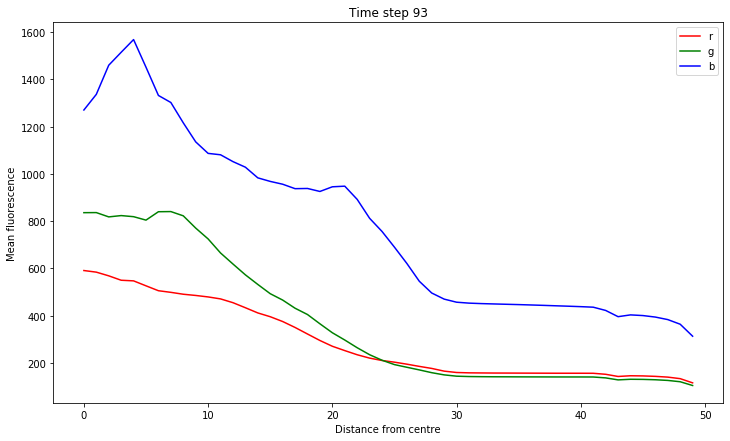

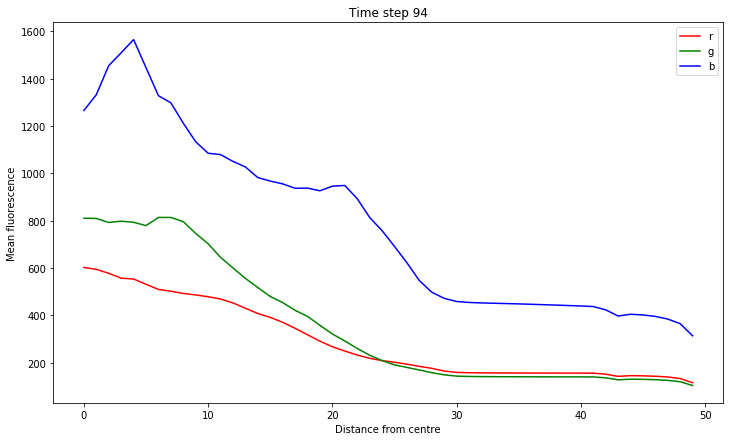

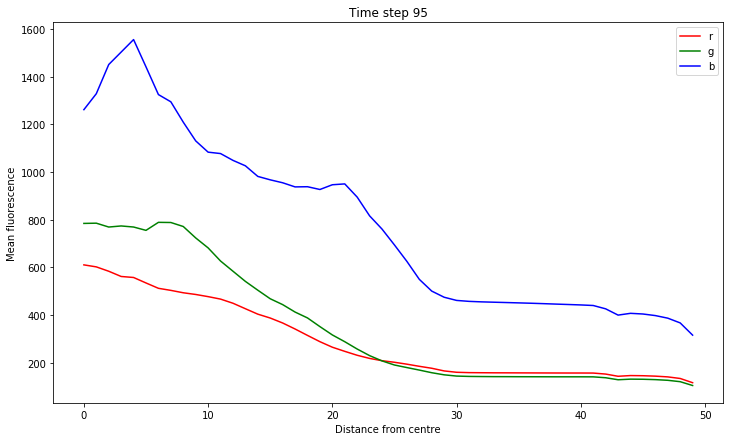

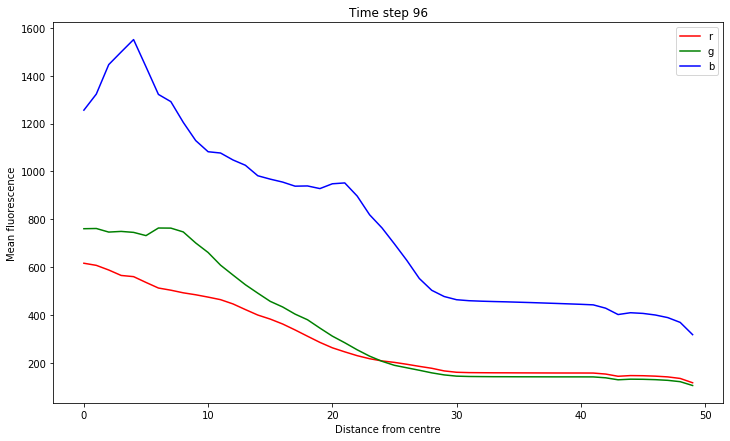

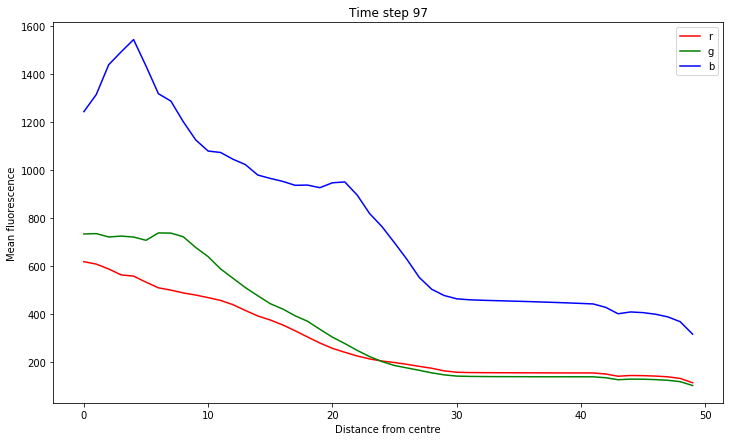

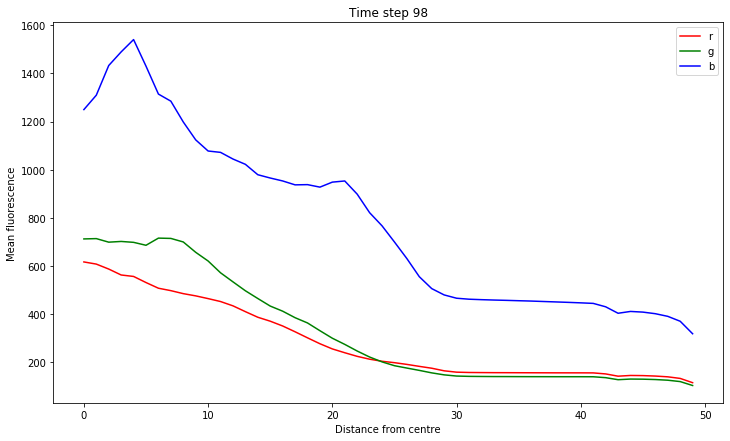

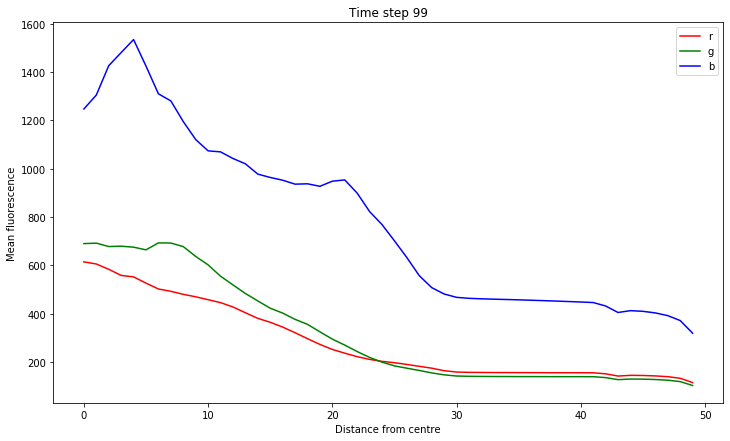

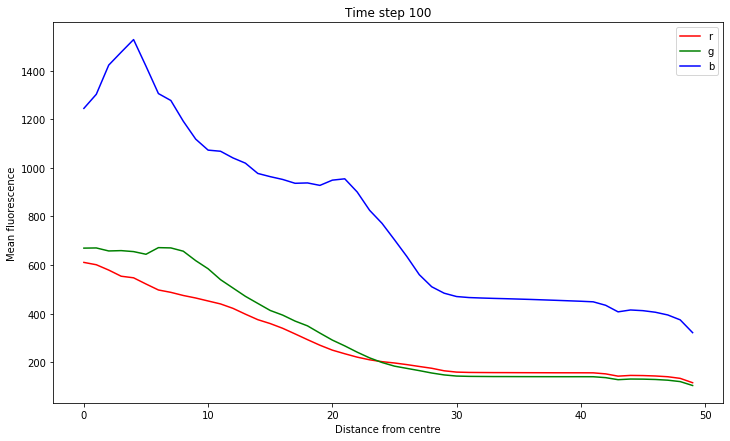

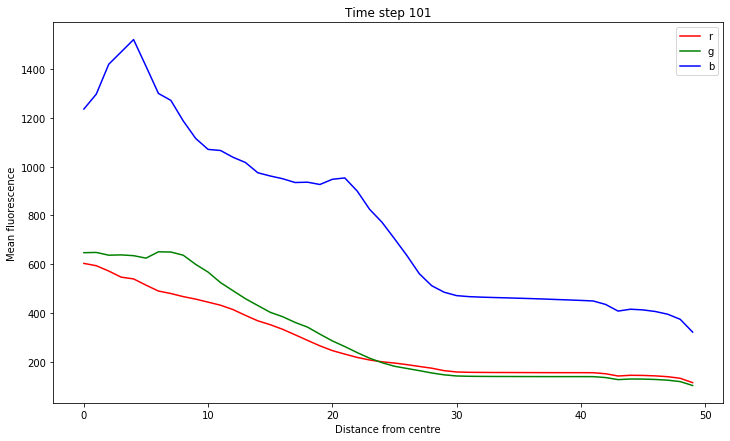

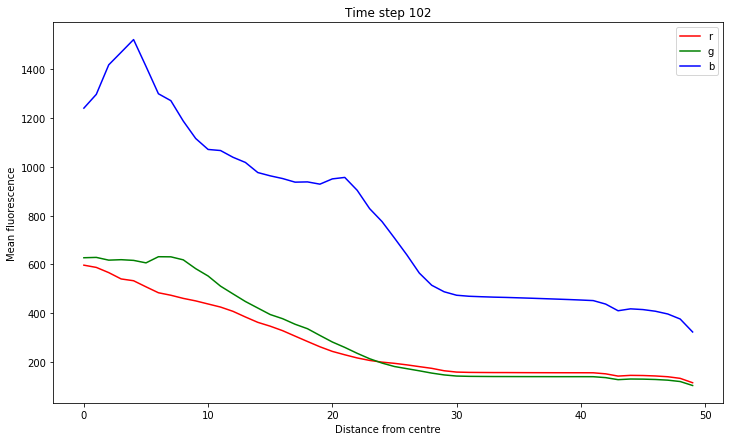

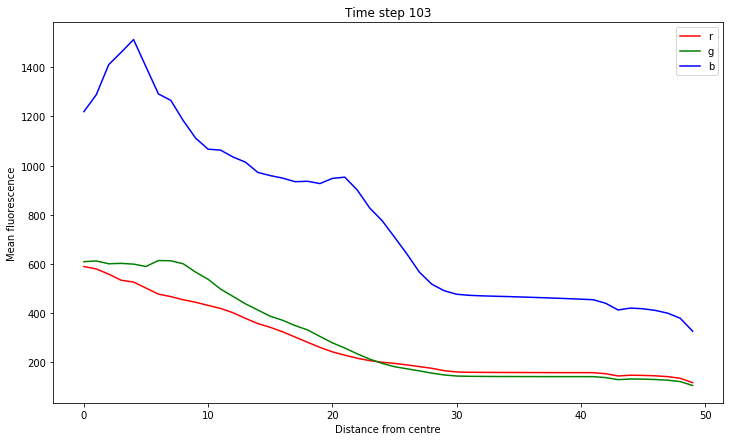

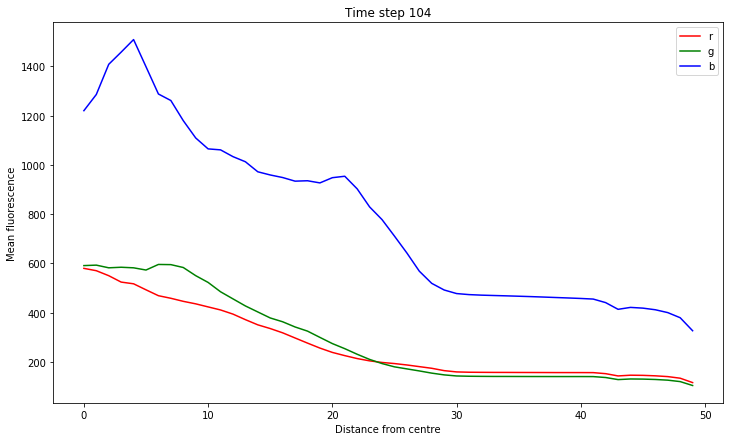

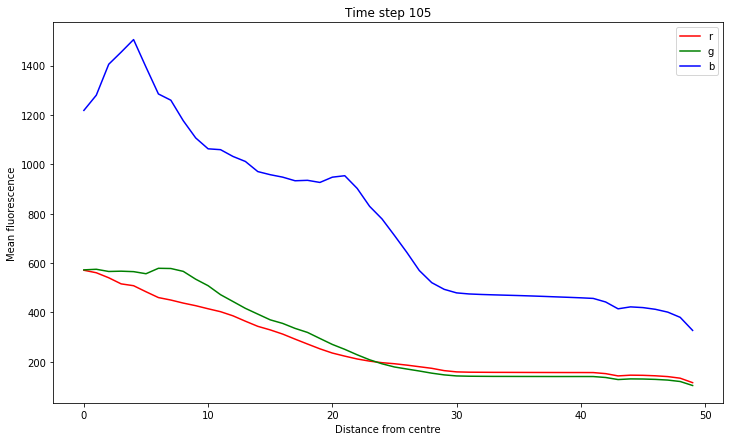

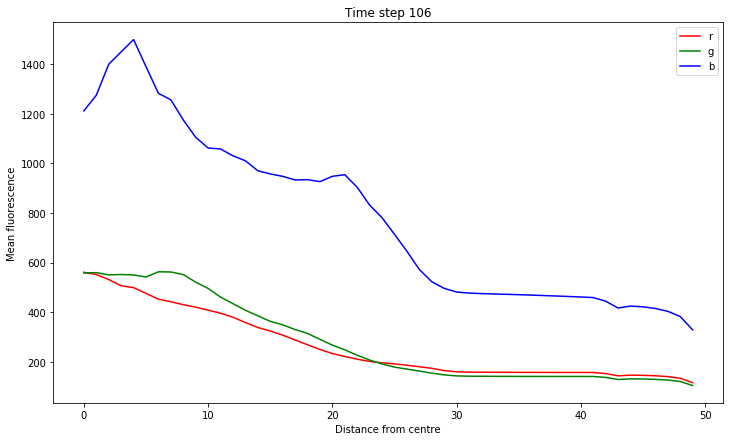

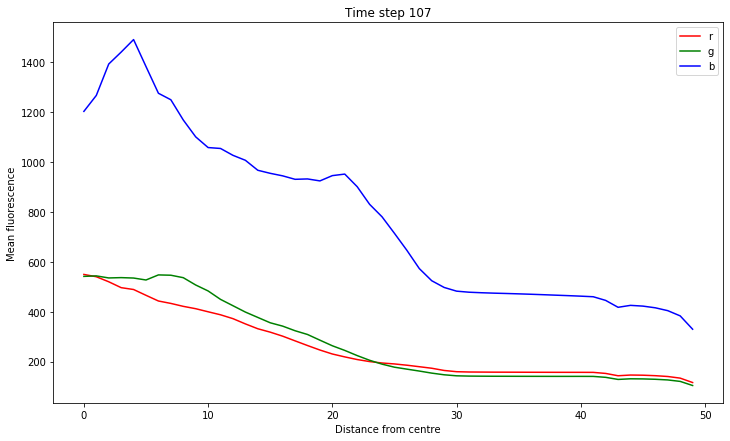

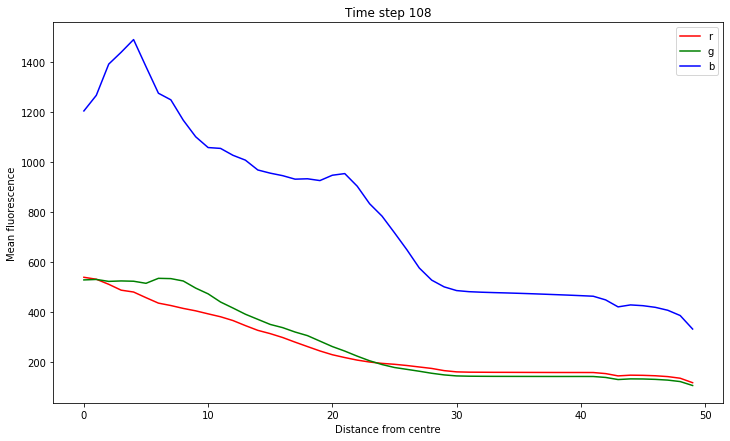

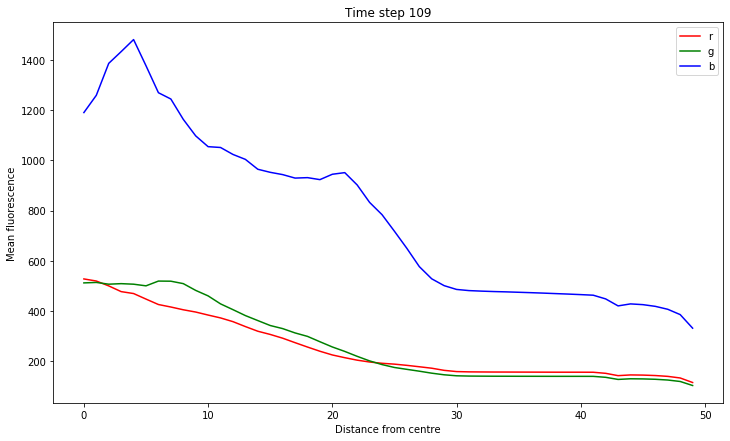

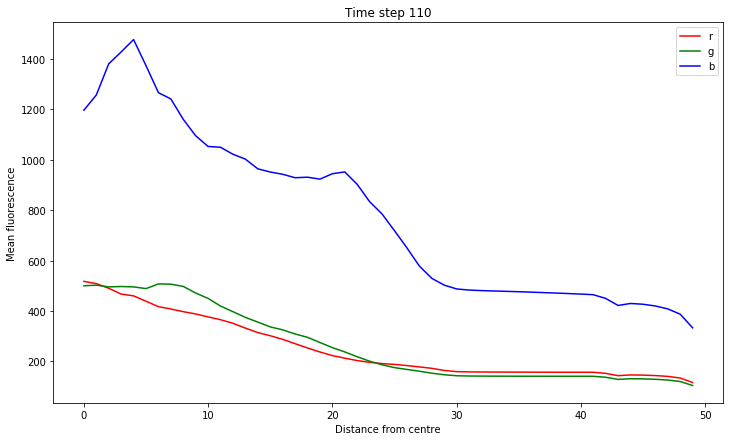

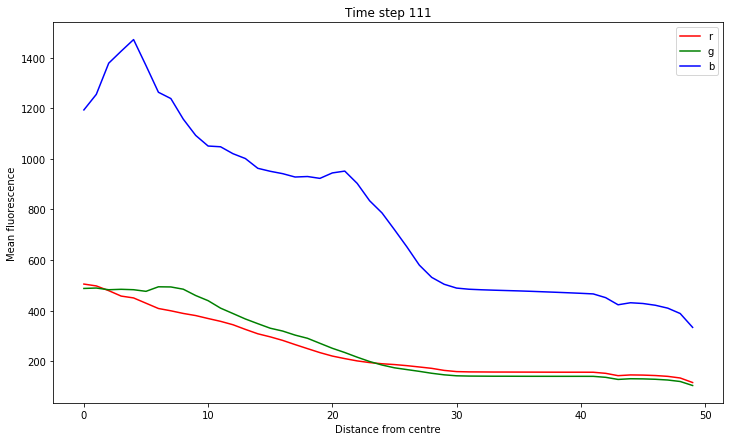

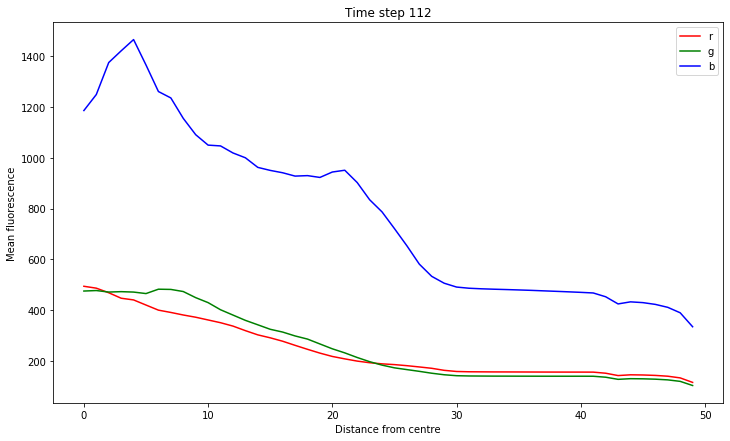

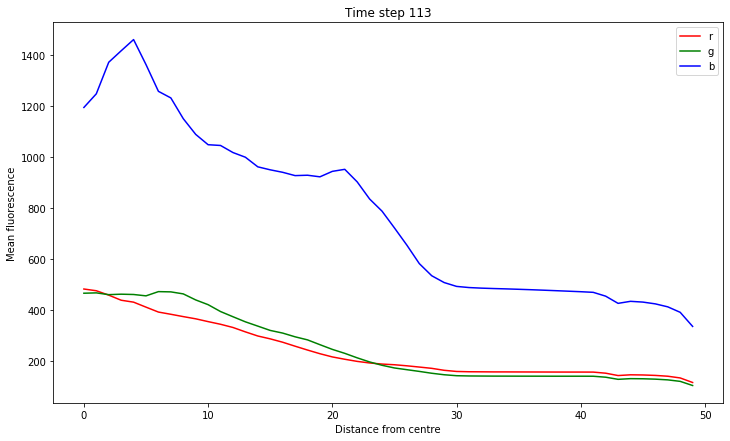

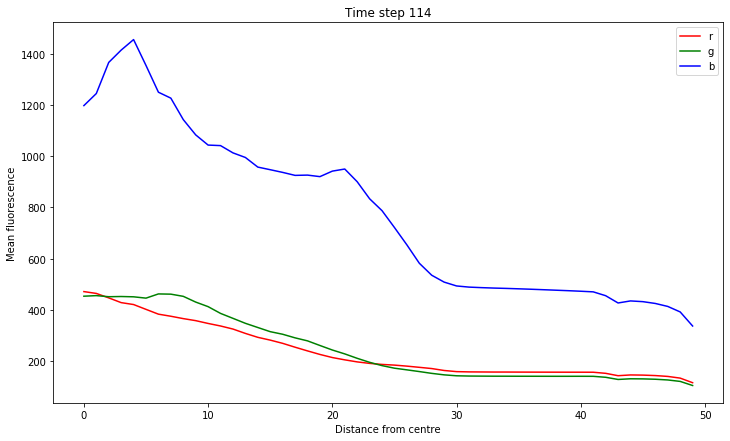

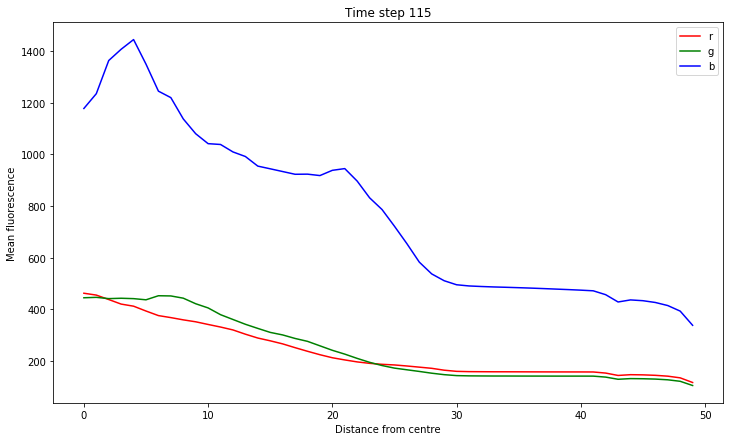

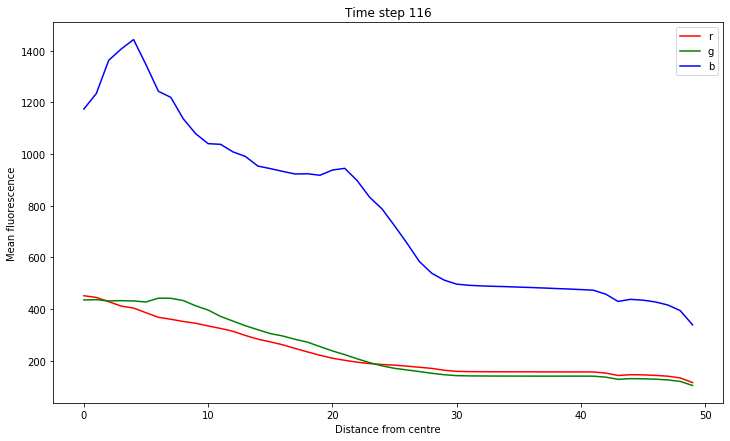

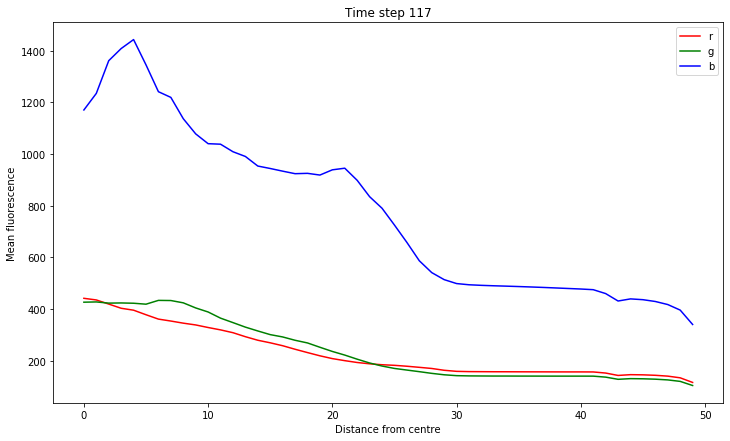

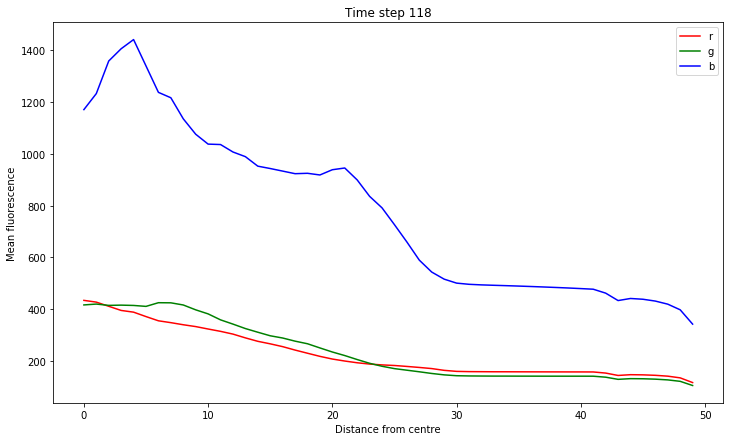

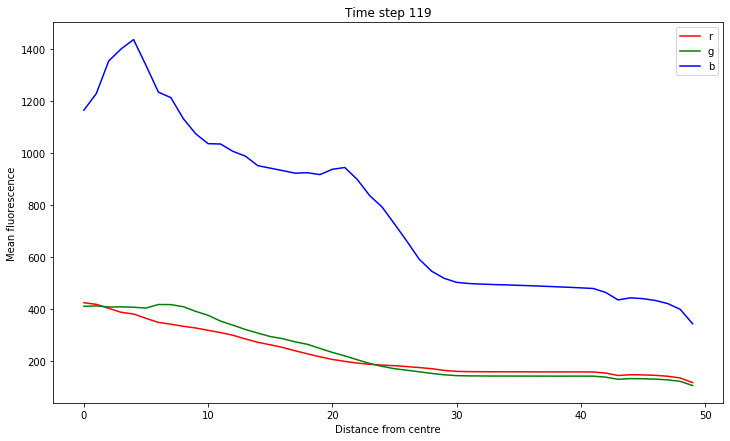

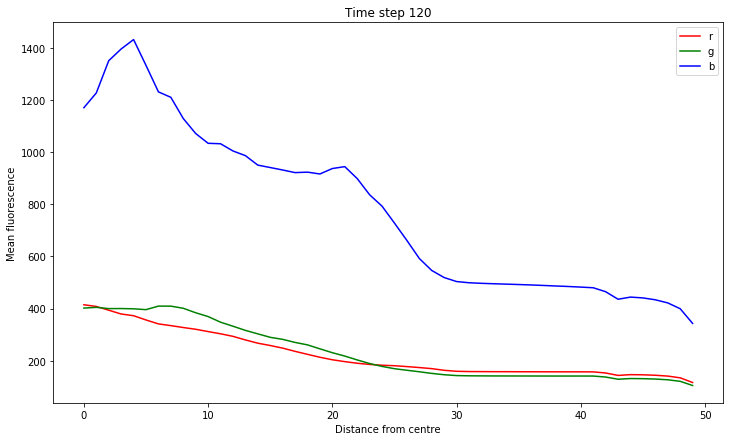

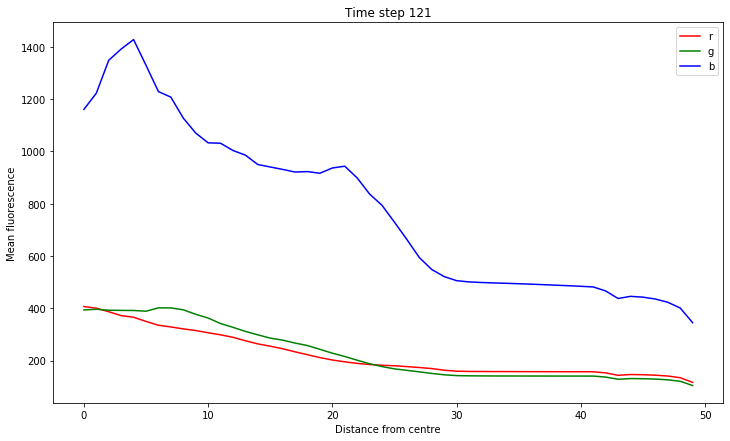

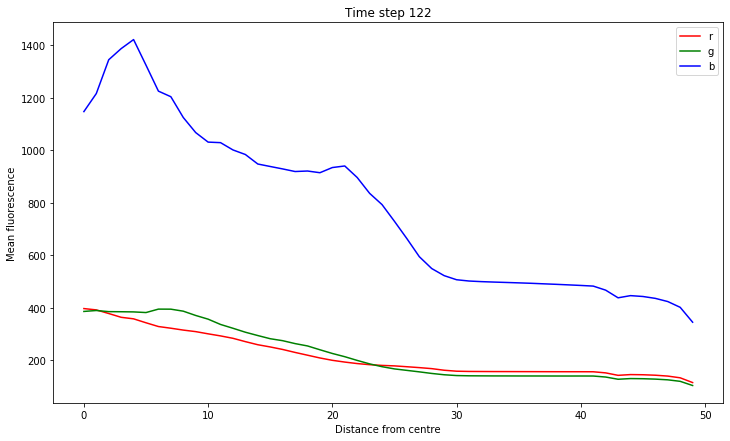

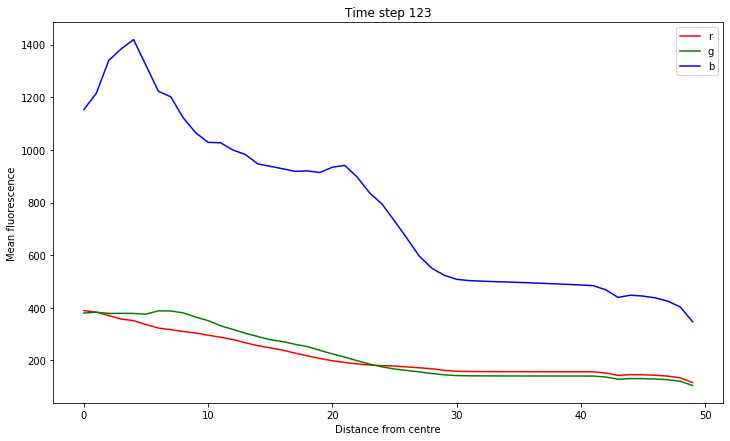

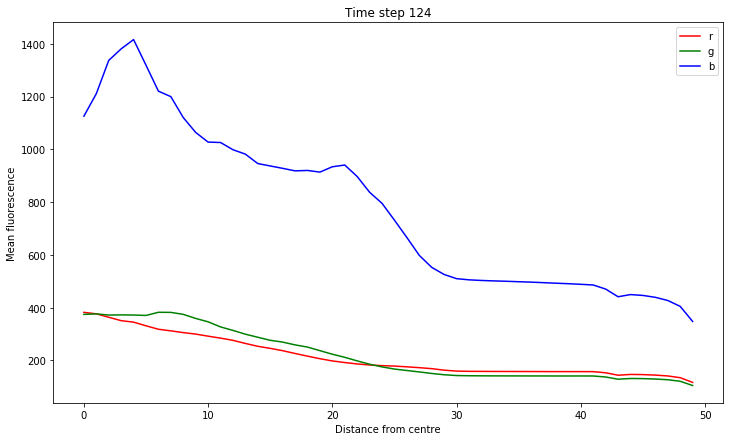

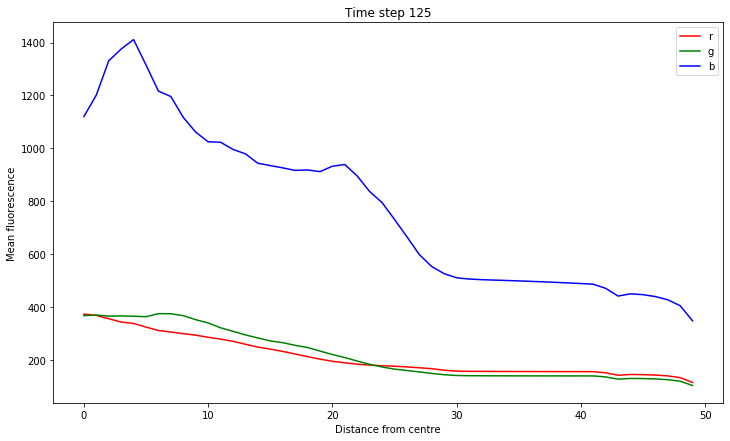

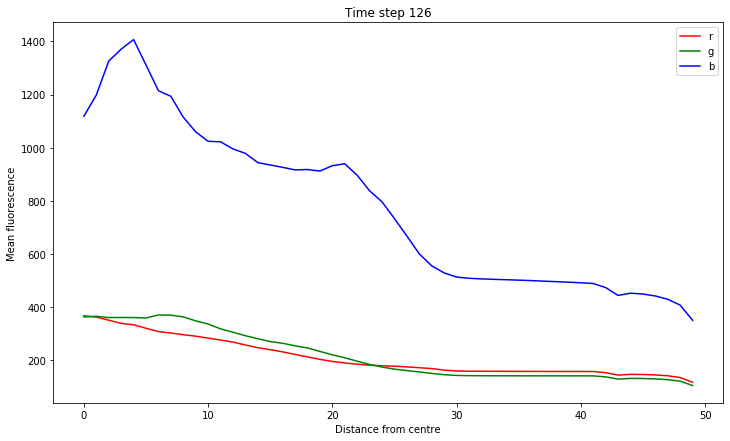

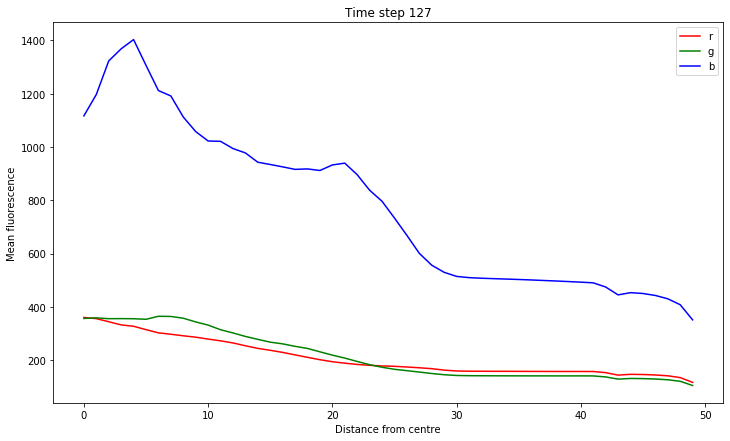

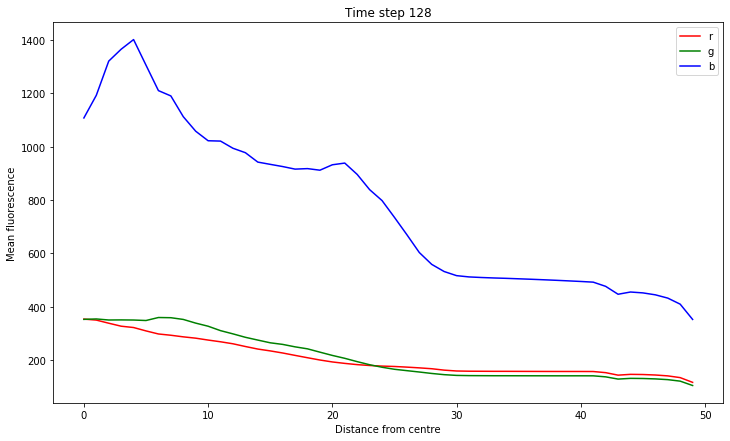

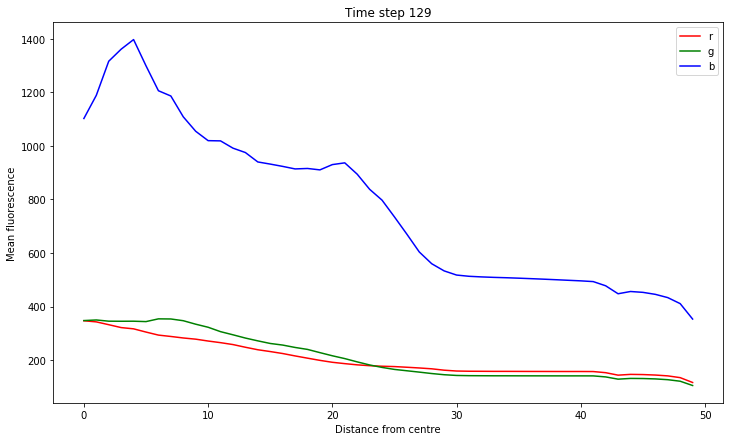

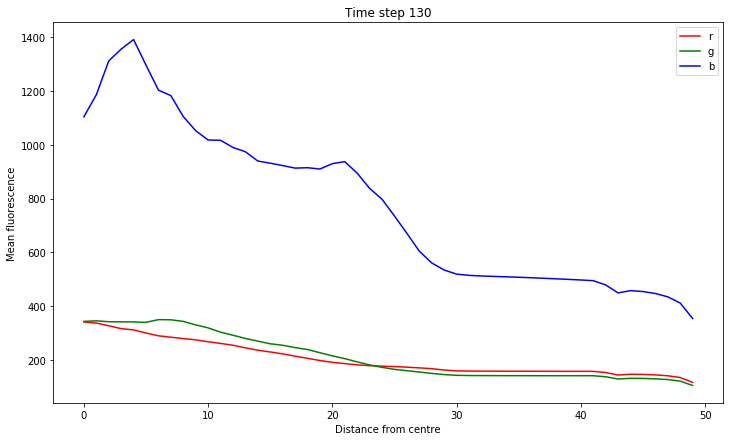

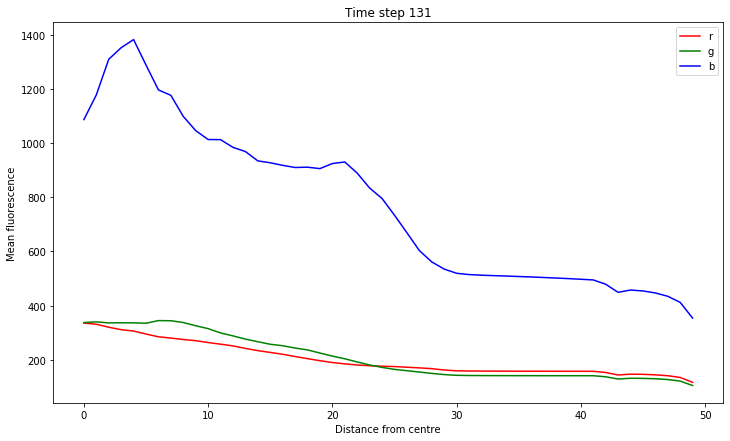

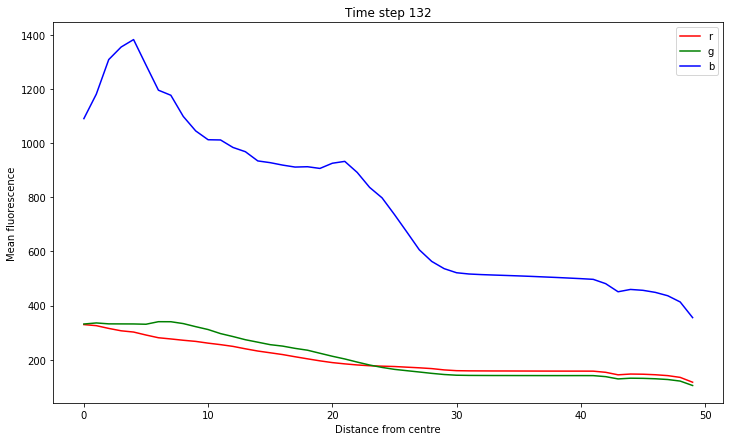

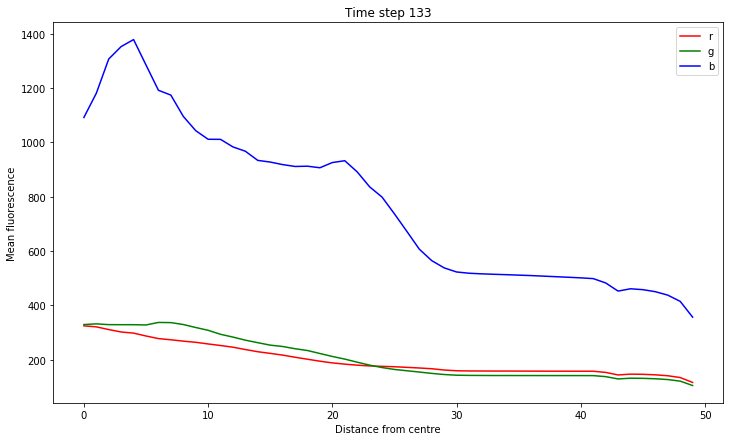

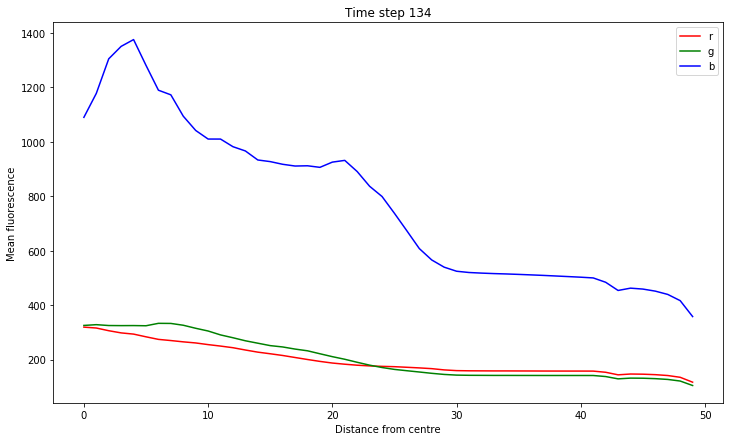

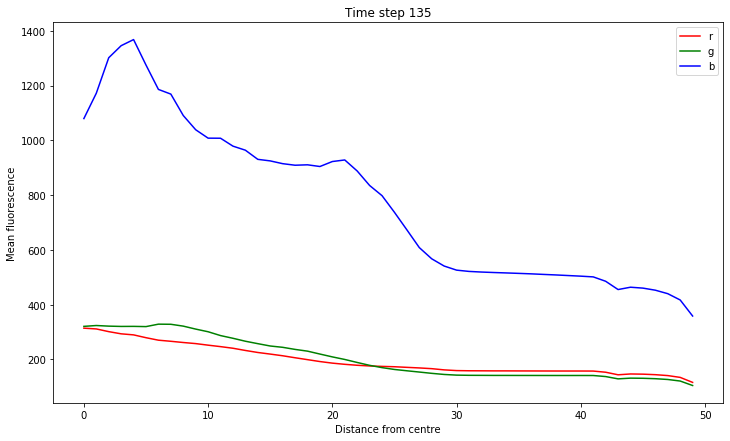

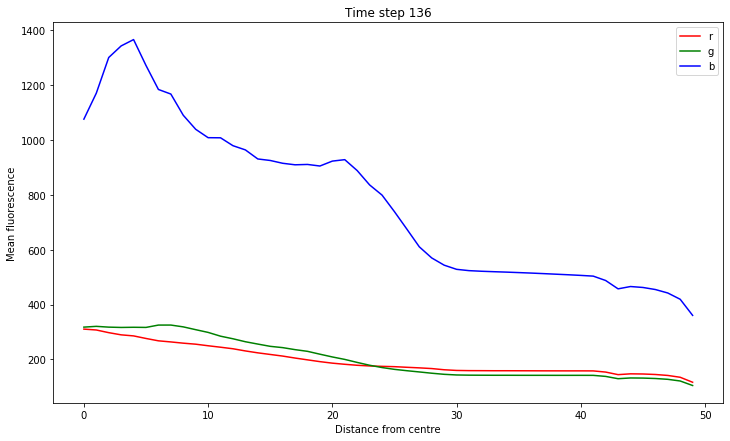

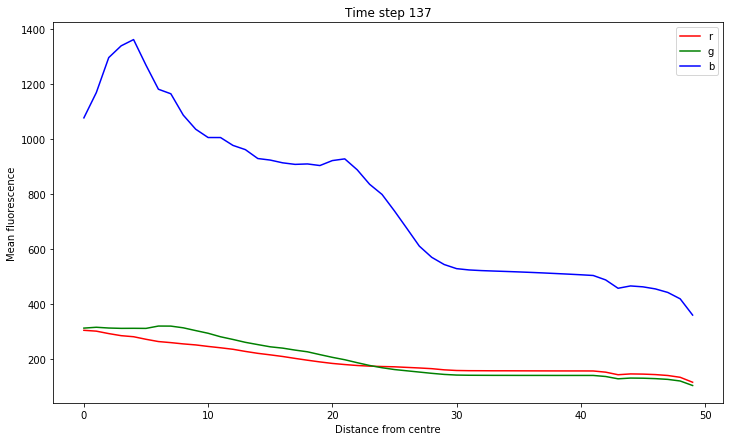

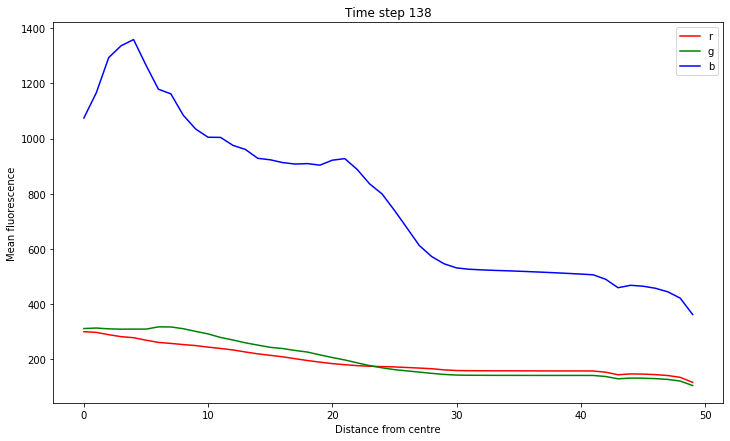

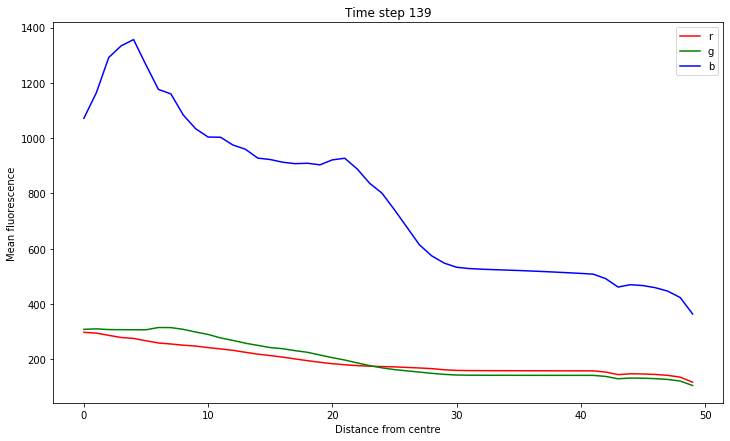

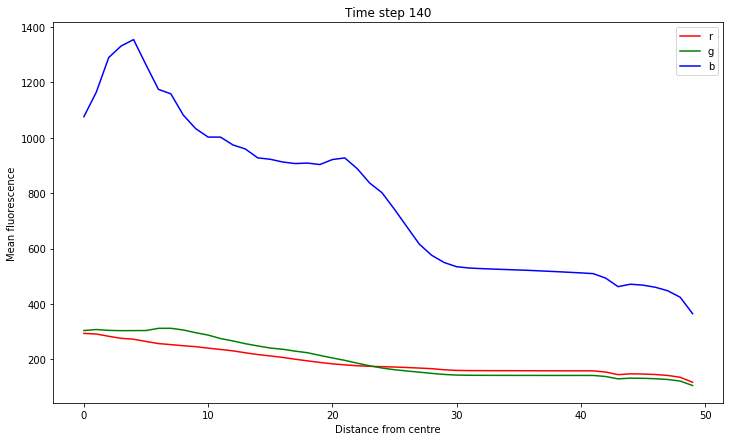

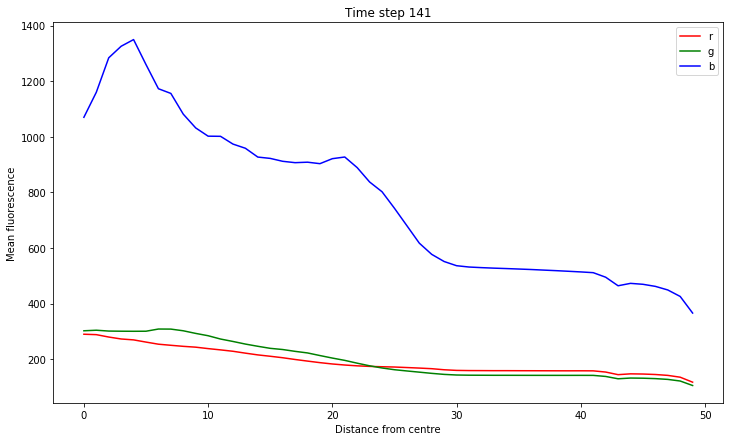

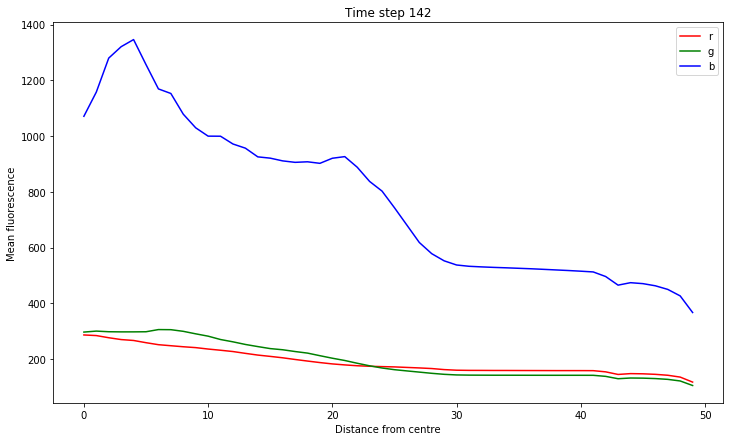

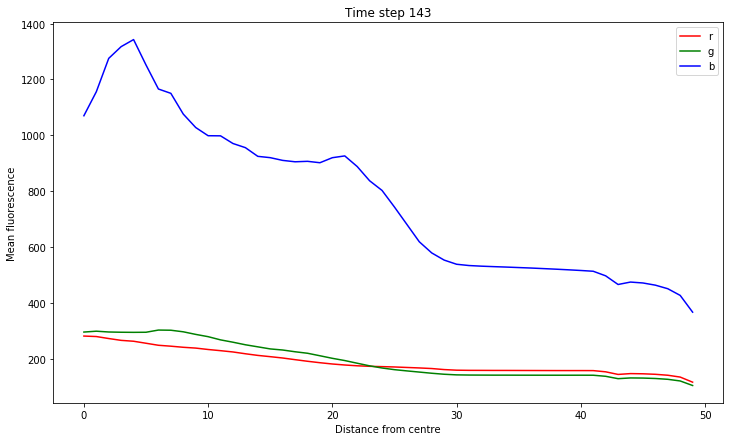

In [52]:
cols = ['r', 'g', 'b']
for t in range(im.shape[0])[14:]:
    plt.figure(figsize=(12,7))
    for c in range(3):
        vals = kymo[t,:,c]
        #nvals = (vals-vals.min()) / (vals.max()-vals.min())
        #plt.plot(nvals, cols[c])
        plt.plot(vals, cols[c])
    plt.xlabel('Distance from centre')
    plt.ylabel('Mean fluorescence')
    plt.legend(cols)
    plt.title('Time step '+str(t))
    z = ''
    if len(str(t)) == 1:
        z='00'
    elif len(str(t)) == 2:
        z='0'
    plt.savefig('plots/t' +z+ str(t)+ '.png')

### Video

In [53]:
image_folder = 'plots/'
video_name = 'wavesnotnorm.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 4, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

video.release()

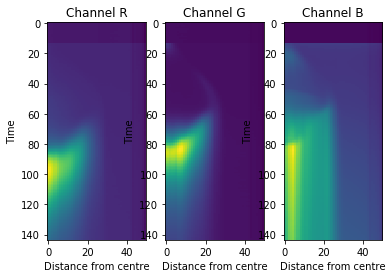

In [29]:
plt.figure()
# normalized kymo
nkymo = np.zeros_like(kymo)
cols = ['R', 'G', 'B']
for c in range(3):
    plt.subplot(1,3,c+1)
    vals = kymo[:,:,c]
    nkymo[:,:,c] = (vals-vals.min()) / (vals.max()-vals.min())
    plt.imshow(nkymo[:,:,c], aspect='auto')
    plt.xlabel('Distance from centre')
    plt.ylabel('Time')
    plt.title("Channel {}".format(cols[c]))